In [1]:
#!pip install apt-get
#!pip install sqlite3
#!pip install sqlalchemy
#!pip install psycopg2
#!pip install lightgbm
#!pip install scikit-optimize

# Business Problem

A **Insurance All** é uma empresa que fornece seguro de saúde para seus clientes e o time de produtos está analisando a possibilidade de oferecer aos assegurados, um novo produto: Um seguro de automóveis.

Assim como o seguro de saúde, os clientes desse novo plano de seguro de automóveis precisam pagar um valor anualmente à Insurance All para obter um valor assegurado pela empresa, destinado aos custos de um eventual acidente ou dano ao veículo.

A Insurance All fez uma pesquisa com cerca de 380 mil clientes sobre o interesse em aderir a um novo produto de seguro de automóveis, no ano passado. Todos os clientes demonstraram interesse ou não em adquirir o seguro de automóvel e essas respostas ficaram salvas em um banco de dados junto com outros atributos dos clientes.

O time de produtos selecionou 127 mil novos clientes que não responderam a pesquisa para participar de uma campanha, no qual receberão a oferta do novo produto de seguro de automóveis. A oferta será feita pelo time de vendas através de ligações telefônicas.

Contudo, o time de vendas tem uma capacidade de realizar 20 mil ligações dentro do período da campanha.

Nesse contexto, você foi contratado como um consultor de Ciência de Dados para construir um modelo que prediz se o cliente estaria ou não interessado no seguro de automóvel. 

Com a sua solução, o time de vendas espera conseguir priorizar as pessoas com maior interesse no novo produto e assim, otimizar a campanha realizando apenas contatos aos clientes mais propensos a realizar a compra.

Como resultado da sua consultoria, você precisará entregar um relatório contendo algumas análises e respostas às seguintes perguntas:

1) Principais Insights sobre os atributos mais relevantes de clientes interessados em adquirir um seguro de automóvel.

2) Qual a porcentagem de clientes interessados em adquirir um seguro de automóvel, o time de vendas conseguirá contatar fazendo 20.000 ligações?

3) E se a capacidade do time de vendas aumentar para 40.000 ligações, qual a porcentagem de clientes interessados em adquirir um seguro de automóvel o time de vendas conseguirá contatar?

4) Quantas ligações o time de vendas precisa fazer para contatar 80% dos clientes interessados em adquirir um seguro de automóvel?

**Business Problem**

    1) Principais Insights sobre os atributos mais relevantes de clientes interessados em adquirir um seguro de automóvel.


**Final Product**
1. Principais insights dos atributos dos clientes

2. Formato da entrega
    Gráficos/Tabela
    
3. Local da entrega
    Telegram/PowerBI


**Process**
1. Passo a passo
    - Realizar feature engineering na base de dados (1º bd - 380K) dos clientes interessados e levantar as hipóteses para cada atributo a ser validada; 
    - No EDA validar as hipóteses e identificar insights dos clientes interessados;


2. Definir o formato da entrega (visualizaçao, tabela, frase)
    - Gráficos que melhor demonstrem as informaçoes.
    - Utilizar os seguintes parâmetros: Id | Gender | Age | Driving License | Region Code | Previously Insured | Vehicle Age | Vehicle Damage | Anual Premium | Policy sales channel | Vintage |
    - Definiçao do schema: colunas e seu tipo
    - Definição da infraestrutura de armazenamento (SQLITE3)
    - Design do ETL (Scripts de Extração, Transformação e Carga)
    - Planejamento de agendamento dos scripts (dependência entre os scripts)
    - Fazer as visualizações
    - Entrega do produto final


3. Decidir o local de entrega (powerBi, telegram, email, streamlit, intranet)
    - PowerBI, Telegram
    
    
**Enter**
1. Fonte de dados:
    - Site da Kaggle
    - BD na AWS

2. Ferramentas:
    - Pyhton 3.8.0
    - AWS
    - Pycharm
    - Jupyter Notebook (análises e prototipagens)
    - Crontjob, Airflow
    - Streamlit
    - PowerBI
    - Telegram

**Business Problem**

    2) Qual a porcentagem de clientes interessados em adquirir um seguro de automóvel, o time de vendas conseguirá contatar fazendo 20.000 ligações?
    3) E se a capacidade do time de vendas aumentar para 40.000 ligações, qual a porcentagem de clientes interessados em adquirir um seguro de automóvel o time de vendas conseguirá contatar?
    4) Quantas ligações o time de vendas precisa fazer para contatar 80% dos clientes interessados em adquirir um seguro de automóvel?


**Final Product**
1. Percentual de clientes interessados da base e se poderá atender o limite de 20K/40K ligaçoes

2. Formato da entrega
    Gráfico ou tabela
    
3. Local da entrega
    Telegram


**Process**
1. Passo a passo
    - Realizar análise da base de dados (2 bd 127 K) e aplicar modelos de ML para obter os atributos que definem
        o cliente com maior probabilidade de adquirir o seguro. Com essas características definir a quantidade 
        de clientes potenciais e se e possível atender com 20/40K ligaçoes.

2. Definir o formato da entrega (visualizaçao, tabela, frase)
    - Gráfico ou tabela

3. Decidir o local de entrega (powerBi, telegram, email, streamlit, intranet)
    - PowerBI, Telegram
    
    
**Enter**
1. Fonte de dados:
    - Site da Kaggle
    - BD na AWS

2. Ferramentas:
    - Pyhton 3.8.0
    - AWS
    - Pycharm
    - Jupyter Notebook (análises e prototipagens)
    - Crontjob, Airflow
    - Streamlit
    - PowerBI
    - Telegram

# Libraries

In [2]:
import csv
import pickle
import random

import numpy                 as np
import pandas                as pd
import seaborn               as sns
import psycopg2              as pg 
import pandas.io.sql         as psql
import matplotlib.pyplot     as plt
import statistics            as st
import scikitplot            as skplt
import xgboost               as xgb

from sklearn.ensemble        import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from boruta                  import BorutaPy
from sklearn.linear_model    import LogisticRegression
from sklearn.neighbors       import KNeighborsClassifier
from sklearn                 import svm
from lightgbm                import LGBMClassifier
from sklearn.naive_bayes     import GaussianNB
from skopt                   import forest_minimize
from skopt.plots             import plot_convergence
from collections             import Counter
from imblearn.combine        import SMOTETomek
from sklearn.model_selection import KFold
from sklearn.pipeline        import make_pipeline
from sklearn.pipeline        import Pipeline
from ReliefF                 import ReliefF
from numpy                   import cov
from numpy                   import percentile
from scipy.stats             import pearsonr
from prettytable             import PrettyTable
from IPython.display         import Image
from sklearn.preprocessing   import StandardScaler
from sklearn.preprocessing   import MinMaxScaler
from sklearn.linear_model    import LinearRegression,Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble        import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

from sklearn                 import decomposition   as d
from sklearn                 import model_selection as ms
from sklearn                 import preprocessing   as pp
from sklearn                 import ensemble        as en
from matplotlib              import pyplot          as plt
from sklearn                 import neighbors       as nh
from sklearn                 import linear_model    as lm

# Helper Functions

In [3]:
def perc_insurance (x):
    j = len(x)
    for i in range(len(x)):
        if i < j:
            p = ((x['total'][i])/(x['total'][i+pow(-1,(i+2))]+x['total'][i]))*100
            x['%_insur_1'][i] = p
        else:
            exit
    return x

def connection_database(host_name, port_num, database_name, user_name, password_name):
    connection = None
    connection = pg.connect(host = host_name,
                            port = port_num,
                            database = database_name,
                            user = user_name,
                            password = password_name)
    return connection

def precision_at_k(data, yhat, perc):
    
    k = int(np.floor(len(data)*perc))
    
    data['score'] = yhat[:,1].tolist()
    
    data = data.sort_values('score',ascending=False)

    #reset index
    data = data.reset_index(drop=True)
    
    #create ranking order
    data['ranking'] = data.index+1
    
    data['precision_at_k'] = data['response'].cumsum() / data['ranking']
    
    return data.loc[k, 'precision_at_k']

def recall_at_k(data, yhat, perc):
    
    k = int(np.floor(len(data)*perc))
    
    data['score'] = yhat[:,1].tolist()
    
    data = data.sort_values('score',ascending=False)
    
    #reset index
    data = data.reset_index(drop=True)
    
    #create ranking order
    data['ranking'] = data.index+1
    
    data['recall_at_k'] = data['response'].cumsum() / data['response'].sum()
    
    return data.loc[k, 'recall_at_k']

def cross_validation(models_performance, num_folds, modelName, model, x_train, y_train):
    kfold=ms.StratifiedKFold(n_splits = num_folds, shuffle=True, random_state=42)
    
    precision_list = []
    recall_list = []
    
    i=1
    for train_cv,val_cv in kfold.split(x_train,y_train):

        x_train_fold = x_train.iloc[train_cv]
        y_train_fold = y_train.iloc[train_cv]

        x_val_fold = x_train.iloc[val_cv]
        y_val_fold = y_train.iloc[val_cv]

        model_fit = model.fit(x_train_fold,y_train_fold)

        yhat_model = model_fit.predict_proba(x_val_fold)
        
        x_val_fold['response'] = y_val_fold
        precision = round(precision_at_k(x_val_fold, yhat_model, 0.20),3)
        recall= round(recall_at_k(x_val_fold, yhat_model, 0.20),3)
        
        precision_list.append(precision)
        recall_list.append(recall)


        i+=1
    
    precision_str = np.round(np.mean(precision_list),4).astype(str) + ' +/- ' + np.round(np.std(precision_list),4).astype(str)
    recall_str = np.round(np.mean(recall_list),4).astype(str) + ' +/- ' + np.round(np.std(recall_list),4).astype(str)

    models_performance = models_performance.append(pd.Series([modelName, precision_str, recall_str], index=models_performance.columns), ignore_index=True)

    return models_performance

def topK_performance(df,yhat,perc):
    df_final_performance = pd.DataFrame()
    k = int(np.floor(len(df)*perc))

    target_total = df['response'].sum()
    df['score'] = yhat[:,1].tolist()
    df = df.sort_values('score',ascending=False)
    target_at_k = df['response'][:k].sum()
    target_perc = target_at_k/target_total

    precision = precision_at_k(df,yhat,perc)
    recall = recall_at_k(df,yhat,perc)

    df_final_performance = df_final_performance.append({'Model':'LGBM','perc':perc,'k':k,'precision':precision,'recall':recall,'target_total':target_total,'target_at_k':target_at_k,'perc_target':target_perc},ignore_index=True)
    return df_final_performance

# 0.0 Data Collect

In [4]:
#credentials

conn = connection_database(host, port, database, user, password)

## 1.0 Schema Query

In [5]:
cursor = conn.cursor()

query_schema = """
    SELECT nspname
    FROM pg_catalog.pg_namespace

"""

cursor.execute(query_schema)

In [6]:
records = cursor.fetchall()
print(records)
#cursor.close()
#conn.close()

[('pg_toast',), ('pg_temp_1',), ('pg_toast_temp_1',), ('pg_catalog',), ('information_schema',), ('public',), ('pa004',), ('pg_temp_4',), ('pg_toast_temp_4',), ('pa005',), ('pg_temp_9',), ('pg_toast_temp_9',)]


## 2.0 Table Query

In [7]:
cursor = conn.cursor()

query_tables = """
    SELECT tablename
    FROM pg_tables
    WHERE schemaname = 'pa004'

"""

cursor.execute(query_tables)

In [8]:
records = cursor.fetchall()
print(records)
#cursor.close()
#conn.close()

[('users',), ('vehicle',), ('insurance',)]


## 3.0 Collect Data using Psycopg2

In [9]:
cursor = conn.cursor()

query_tables_users = """
    SELECT *
    FROM pa004.users u
    WHERE u.age >40
    limit 10

"""

cursor.execute(query_tables_users)

In [10]:
records = cursor.fetchall()
print(records)
#cursor.close()
#conn.close()

[(1, 'Male', 44, 28.0, 26.0), (2, 'Male', 76, 3.0, 26.0), (3, 'Male', 47, 28.0, 26.0), (8, 'Female', 56, 28.0, 26.0), (11, 'Female', 47, 35.0, 124.0), (13, 'Female', 41, 15.0, 14.0), (14, 'Male', 76, 28.0, 13.0), (15, 'Male', 71, 28.0, 30.0), (19, 'Male', 42, 28.0, 124.0), (20, 'Female', 60, 33.0, 124.0)]


In [11]:
data = pd.DataFrame(records)
data.head()

,0,1,2,3,4
0,1,Male,44,28.0,26.0
1,2,Male,76,3.0,26.0
2,3,Male,47,28.0,26.0
3,8,Female,56,28.0,26.0
4,11,Female,47,35.0,124.0


## 4.0 Collect using Pandas

In [12]:
query_tables_users = """
    SELECT *
    FROM pa004.users u
"""

df_users = psql.read_sql(query_tables_users,conn)

query_tables_vehicle = """
    SELECT *
    FROM pa004.vehicle v
"""

df_vehicle = psql.read_sql(query_tables_vehicle,conn)

query_tables_insurance = """
    SELECT *
    FROM pa004.insurance i
"""

df_insurance = psql.read_sql(query_tables_insurance,conn)

query_tables_all = """
    SELECT *
    FROM pa004.insurance i inner join pa004.vehicle v on (i.id = v.id)
                           inner join pa004.users u on (i.id = u.id)
"""

df = psql.read_sql(query_tables_all,conn)

df.to_csv('data.csv')



In [49]:
df = pd.read_csv('data.csv')
df = df.drop(['Unnamed: 0', 'id.1', 'id.2'], axis=1)

# 1.0. Data Description

In [50]:
X_init = df.drop(['response'], axis = 1)
y_init = df['response'].copy()

x_df, x_test, y_df, y_test = ms.train_test_split(X_init,y_init,test_size=0.1)
x_test_id = x_test['id']
df = pd.concat([x_df, y_df], axis = 1)

In [51]:
df1 = df.copy()

## 1.1. Data Dimensions

In [18]:
print('Number of columns: ', df1.shape[1])
print('Number of rows: ', df1.shape[0])

Number of columns:  12
Number of rows:  342998


## 1.2. Data Types

In [19]:
df1.dtypes

id                        int64
previously_insured        int64
annual_premium          float64
vintage                   int64
driving_license           int64
vehicle_age              object
vehicle_damage           object
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
response                  int64
dtype: object

## 1.3. Checking NA

In [20]:
df1.isna().sum()

id                      0
previously_insured      0
annual_premium          0
vintage                 0
driving_license         0
vehicle_age             0
vehicle_damage          0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
response                0
dtype: int64

## 1.4. Unity Change

In [21]:
#annual_premium
df1['annual_premium'] = np.int64(df1['annual_premium'])

In [22]:
#region_code
df1['region_code'] = np.int64(df1['region_code'])

In [23]:
#policy_sales_channel
df1['policy_sales_channel'] = np.int64(df1['policy_sales_channel'])

In [24]:
df1.dtypes

id                       int64
previously_insured       int64
annual_premium           int64
vintage                  int64
driving_license          int64
vehicle_age             object
vehicle_damage          object
gender                  object
age                      int64
region_code              int64
policy_sales_channel     int64
response                 int64
dtype: object

## 1.5. Descriptive Statiscal

In [25]:
num_attributes = df1.select_dtypes(include = ['int64', 'float64'])
cat_attributes = df1.select_dtypes(include = ['int64', 'float64', 'datetime64[ns]'])

### 1.5.1. Numerical

In [26]:
#central tendency - mean, median, mode
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
ct3 = pd.DataFrame(num_attributes.apply(st.mode)).T

#Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(min)).T
d2 = pd.DataFrame(num_attributes.apply(max)).T
d3 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d4 = pd.DataFrame(num_attributes.apply(np.std)).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#concatenate
m = pd.concat([d1,d2,d3,ct1,ct2,ct3,d4,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','mode','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,mode,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190565.783005,190458.0,215117.0,110007.848952,0.000461,-1.200013
1,previously_insured,0.0,1.0,1.0,0.458087,0.0,0.0,0.498240,0.168244,-1.971705
2,annual_premium,2630.0,540165.0,537535.0,30547.037983,31646.0,2630.0,17205.454482,1.763100,34.388507
3,vintage,10.0,299.0,289.0,154.362795,154.0,187.0,83.695768,0.003418,-1.200803
4,driving_license,0.0,1.0,1.0,0.997866,1.0,1.0,0.046147,-21.577366,463.585417
5,age,20.0,85.0,65.0,38.811763,36.0,24.0,15.502912,0.672599,-0.565170
6,region_code,0.0,52.0,52.0,26.383821,28.0,28.0,13.232718,-0.114865,-0.869459
7,policy_sales_channel,1.0,163.0,162.0,112.033067,132.0,152.0,54.204728,-0.900081,-0.970473
8,response,0.0,1.0,1.0,0.122648,0.0,0.0,0.328033,2.300708,3.293277


### 1.5.2. Categorical

Text(0.5, 1.0, 'Interest in insurance by gender')

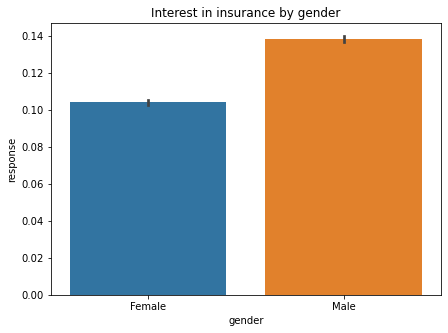

In [27]:
fig_dims = (7, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x='gender', y='response', ax=ax, data=df1)
plt.title('Interest in insurance by gender')

Text(0.5, 1.0, 'interest in insurance by vehicle age')

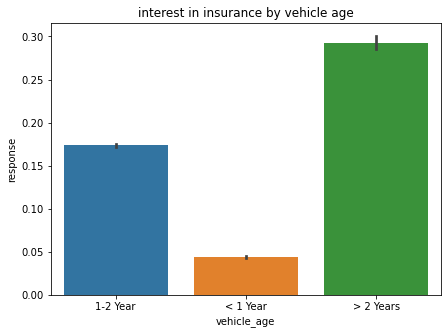

In [28]:
fig_dims = (7, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x='vehicle_age', y='response', ax=ax, data=df1)
plt.title('interest in insurance by vehicle age')

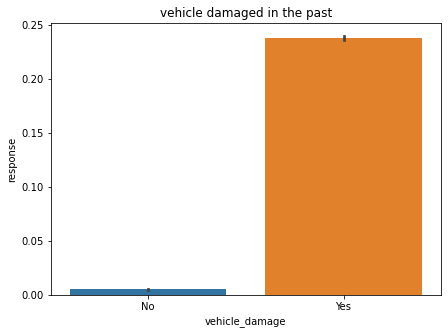

In [29]:
fig_dims = (7, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x='vehicle_damage', y='response', ax=ax, data=df1)
plt.title('vehicle damaged in the past');

# 2.0. Feature Engineering

In [17]:
df2 = df1.copy()

In [18]:
#vehicle_damage
df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)

#vehicle_age
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'under 1 yr'
                                              if x == '< 1 Year' else x)
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'between 1 - 2yr'
                                              if x == '1-2 Year' else x)
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'over 2 yr'
                                              if x == '> 2 Years' else x)

#transform to (int)
#df1['vehicle_age'] = pd.to_numeric(df1['vehicle_age'],errors = 'coerce')

## 2.1 Mind Map

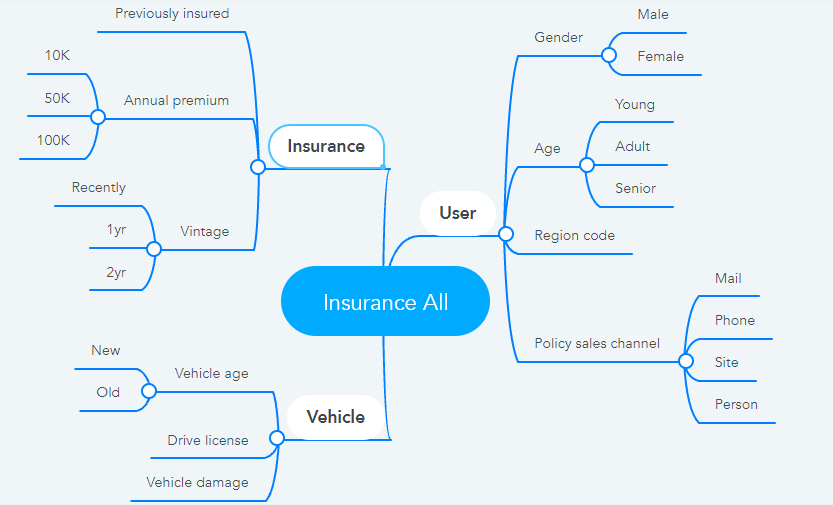

In [19]:
Image('C:/Users/Henrique/repos/Insurance All/mindmap.png')

In [20]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['Category','Name', 'Code', 'Unity']) 

myTable.align["Name"] = "l"

# Add rows 
myTable.add_row(['User', 'Age', 'age', 'int (days)']) 
myTable.add_row(['User', 'Gender', 'gender', 'int - 1 (women) 2 (men)']) 
myTable.add_row(['User', 'Region code', 'region_code', 'int'])
myTable.add_row(['User', 'Policy sales channel', 'policy_sales_channel', 'int'])
myTable.add_row(['', '', '', ''])
myTable.add_row(['Vehicle','Vehicle age','vehicle_age', 'float'])
myTable.add_row(['Vehicle','Drive license','driving_license', 'int - 0 (no) 1 (yes)'])
myTable.add_row(['Vehicle','Vehicle damage','vehicle_damage', 'int - 0 (no) 1 (yes)'])
myTable.add_row(['', '', '', ''])
myTable.add_row(['Insurance','Previously insured','previously_insured', 'int - 0 (no) 1 (yes)'])
myTable.add_row(['Insurance','Annual premium','annual_premium', 'int'])
myTable.add_row(['Insurance','Vintage','vintage', 'int'])

print(myTable)

+-----------+----------------------+----------------------+-------------------------+
|  Category | Name                 |         Code         |          Unity          |
+-----------+----------------------+----------------------+-------------------------+
|    User   | Age                  |         age          |        int (days)       |
|    User   | Gender               |        gender        | int - 1 (women) 2 (men) |
|    User   | Region code          |     region_code      |           int           |
|    User   | Policy sales channel | policy_sales_channel |           int           |
|           |                      |                      |                         |
|  Vehicle  | Vehicle age          |     vehicle_age      |          float          |
|  Vehicle  | Drive license        |   driving_license    |   int - 0 (no) 1 (yes)  |
|  Vehicle  | Vehicle damage       |    vehicle_damage    |   int - 0 (no) 1 (yes)  |
|           |                      |                  

## 2.2 Hypothesis Creation

### 2.2.1 User Hypothesis

**1.** People between 30 years old are more susceptible to have an insurance

**2.** Women hire more insurances

### 2.2.2 Vehicle Hypothesis

**3.** Owners with new cars (< 1 yr) hire more insurances

**4.** People with drive license hire more insurances

**5.** Owners with vehicle damaged dont hire insurances

### 2.2.3 Insurance Hypothesis

**6.** People previously insured hire another insurance

**7.** Higher than 50K annual premium there are more insurances

**8.** More days with company more insurances get

# 3.0 Data Selecting

In [21]:
df3 = df2.copy()

## 3.1. Identifying Outliers

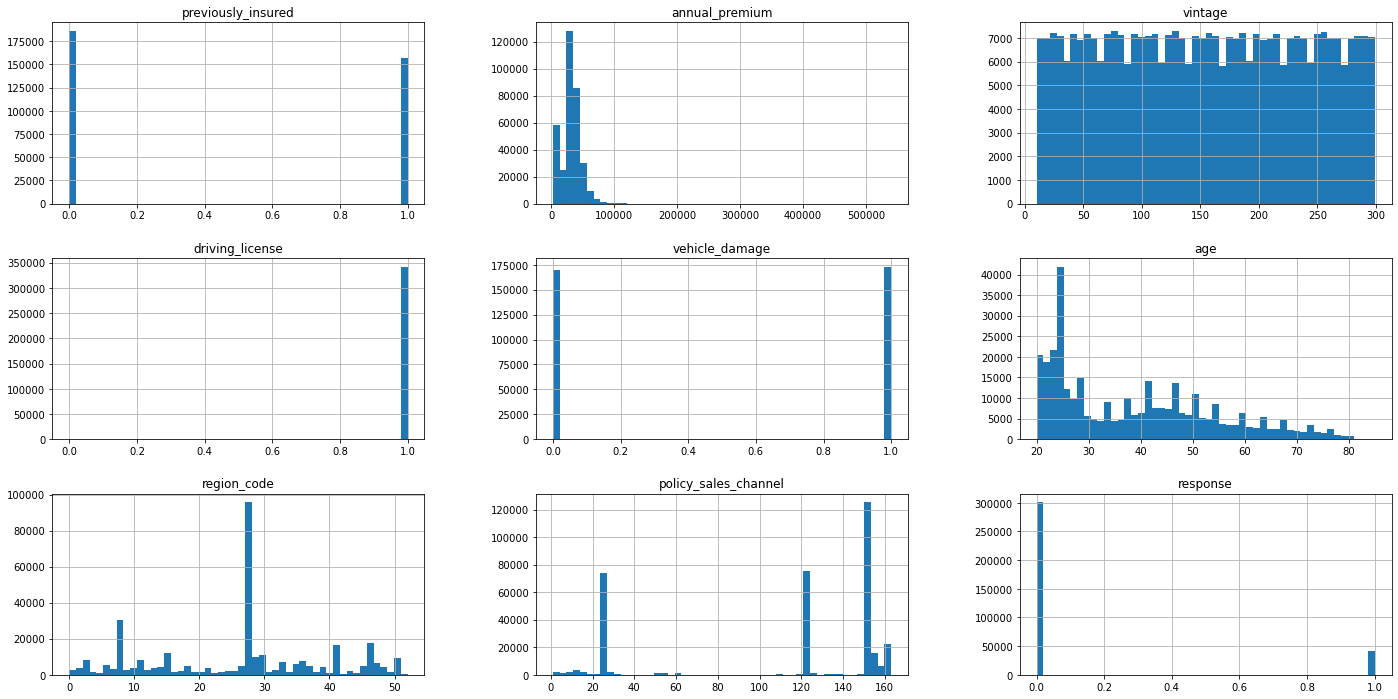

In [22]:
df32 = df3.drop('id', axis=1)
df32.hist(figsize=(24,12), bins=50);

C:\Users\Henrique\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


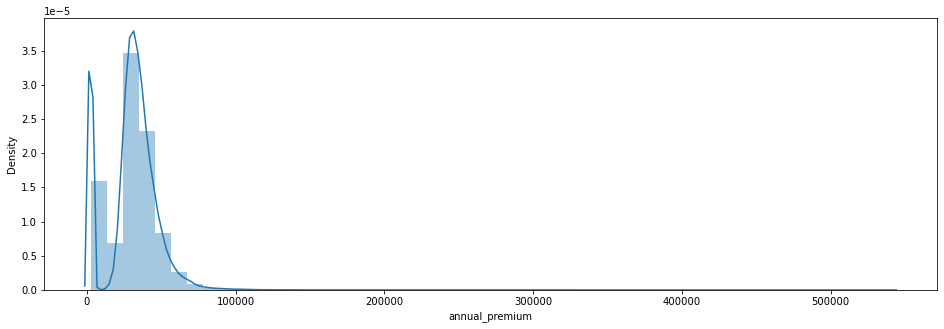

In [23]:
# histogram
plt.figure(figsize=(16,5))
plt.subplot(1,1,1)
sns.distplot(df3['annual_premium'])
#plt.subplot(1,2,2)
#sns.distplot(df['placement_exam_marks'])
plt.show()

In [24]:
df3['annual_premium'].unique().size

47666

### 3.1.1 IQR - Annual Premium

In [25]:
# calculate interquartile range
q25, q75 = percentile(df3['annual_premium'], 25), percentile(df3['annual_premium'], 75)
iqr = q75 - q25
print('Percentiles: 25th = ', q25 , '75th = ', q75, 'IQR= ', iqr)

Percentiles: 25th =  24400.0 75th =  39385.0 IQR=  14985.0


In [26]:
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print(lower, upper)

1922.5 61862.5


In [27]:
#identify outliers
df3['outliers'] = df3.apply(lambda x: 1 if (x['annual_premium'] < lower or x['annual_premium'] > upper) else 0, axis=1)

#remove outliers
df3 = df3[(df3['outliers'] == 0)]

df3 = df3.drop(['outliers'], axis=1)

In [28]:
num_attributes = df1.select_dtypes(include = ['int64', 'float64'])
#cat_attributes = df1.select_dtypes(include = ['int64', 'float64', 'datetime64[ns]'])

#central tendency - mean, median, mode
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
ct3 = pd.DataFrame(num_attributes.apply(st.mode)).T

#Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(min)).T
d2 = pd.DataFrame(num_attributes.apply(max)).T
d3 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d4 = pd.DataFrame(num_attributes.apply(np.std)).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#concatenate
m = pd.concat([d1,d2,d3,ct1,ct2,ct3,d4,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','mode','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,mode,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190496.812868,190425.5,347271.0,109993.768364,0.000794,-1.199437
1,previously_insured,0.0,1.0,1.0,0.458058,0.0,0.0,0.498238,0.168362,-1.971666
2,annual_premium,2630.0,540165.0,537535.0,30552.630768,31670.0,2630.0,17184.738437,1.702028,32.330695
3,vintage,10.0,299.0,289.0,154.279669,154.0,256.0,83.671974,0.004895,-1.200516
4,driving_license,0.0,1.0,1.0,0.997875,1.0,1.0,0.046053,-21.622003,465.513734
5,age,20.0,85.0,65.0,38.827920,36.0,24.0,15.506886,0.672405,-0.563990
6,region_code,0.0,52.0,52.0,26.391542,28.0,28.0,13.229983,-0.115532,-0.867073
7,policy_sales_channel,1.0,163.0,162.0,111.991466,131.0,152.0,54.217419,-0.898309,-0.974032
8,response,0.0,1.0,1.0,0.122499,0.0,0.0,0.327862,2.302816,3.302981


# 4.0 Exploratory Data Analysis

In [29]:
df4 = df3.copy()

## 4.1. Univariate Analysis

<AxesSubplot:xlabel='response', ylabel='age'>

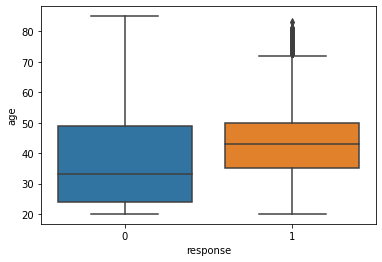

In [43]:
#age
sns.boxplot(x='response', y='age', data=df4)

<AxesSubplot:xlabel='age', ylabel='Count'>

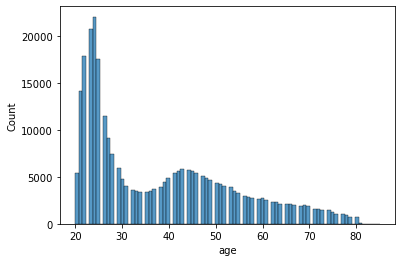

In [44]:
aux00 = df4.loc[df4['response'] == 0, 'age']
sns.histplot(aux00)

<AxesSubplot:xlabel='age', ylabel='Count'>

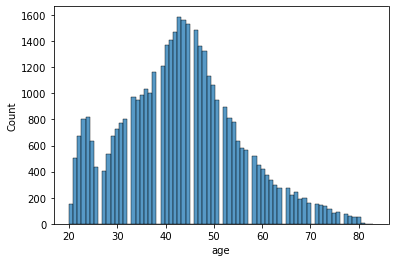

In [45]:
aux01 = df4.loc[df4['response'] == 1, 'age']
sns.histplot(aux01)

<AxesSubplot:xlabel='response', ylabel='annual_premium'>

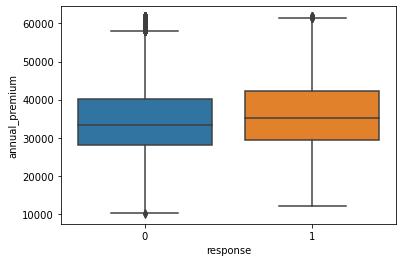

In [46]:
#annual_premium
aux1 = df4[(df4['annual_premium'] > 10000) & (df4['annual_premium'] < 80000)]
sns.boxplot(x='response', y='annual_premium', data=aux1)

<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

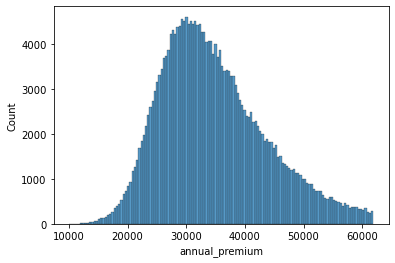

In [47]:
aux00 = aux1.loc[aux1['response'] == 0, 'annual_premium']
sns.histplot(aux00)

<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

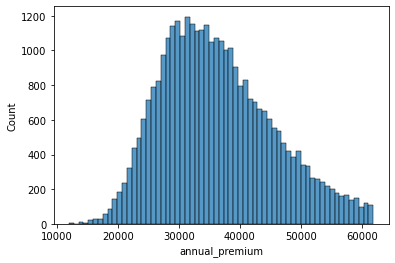

In [48]:
aux01 = aux1.loc[aux1['response'] == 1, 'annual_premium']
sns.histplot(aux01)

,response,driving_license,driving_license_perc
0,0,292383,0.877932
1,1,40653,0.122068


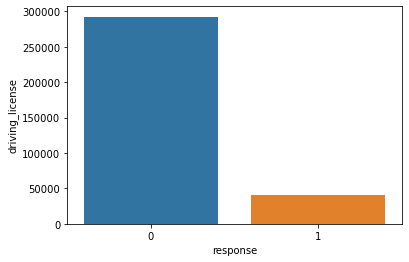

In [49]:
#driving_license
aux1 = df4[['driving_license', 'response']].groupby('response').sum().reset_index()
sns.barplot(x='response', y='driving_license', data=aux1)
aux1['driving_license_perc'] = aux1['driving_license'] / aux1['driving_license'].sum()
aux1

<AxesSubplot:xlabel='region_code', ylabel='id'>

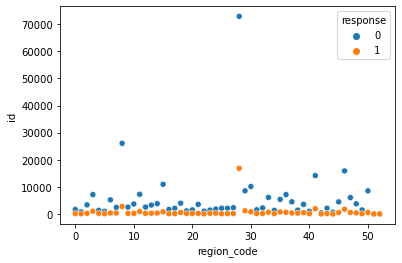

In [50]:
#region_code
aux1 = df4[['id','region_code','response']].groupby(['region_code','response']).count().reset_index()
sns.scatterplot(x='region_code', y='id', hue='response', data=aux1)

In [51]:
#previously_insured
pd.crosstab(df4['previously_insured'], df4['response']).apply(lambda x: x/x.sum(), axis=1)

response,0,1
previously_insured,,
0,0.775189,0.224811
1,0.999081,0.000919


In [52]:
#vehicle_age
df4[['vehicle_age', 'response']].value_counts(normalize=True).reset_index()

,vehicle_age,response,0
0,between 1 - 2yr,0,0.432463
1,under 1 yr,0,0.416690
2,between 1 - 2yr,1,0.091126
3,over 2 yr,0,0.028916
4,under 1 yr,1,0.019046
5,over 2 yr,1,0.011758


<AxesSubplot:xlabel='response', ylabel='policy_sales_channel'>

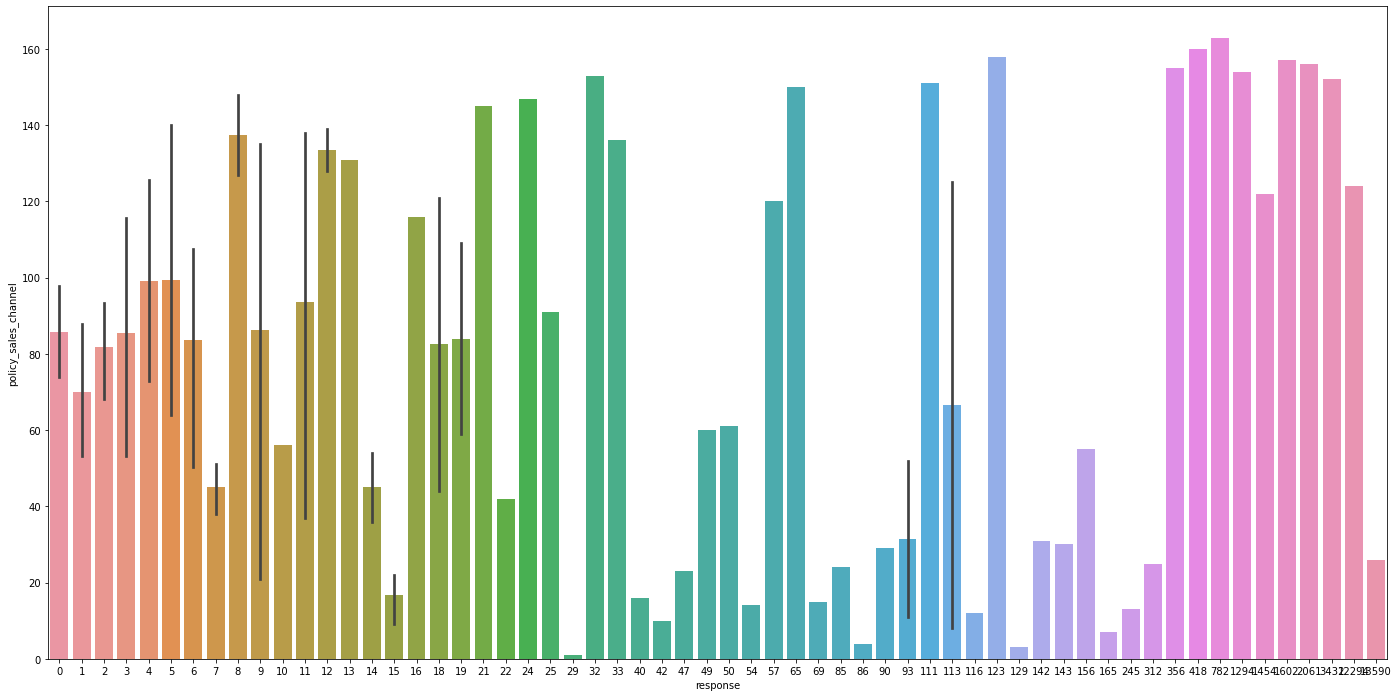

In [53]:
#policy_channel
plt.figure(figsize=(24,12))
aux1 = df4[['policy_sales_channel', 'response']].groupby('policy_sales_channel').sum().reset_index()
sns.barplot(x='response', y='policy_sales_channel', data=aux1)

<AxesSubplot:xlabel='response', ylabel='vintage'>

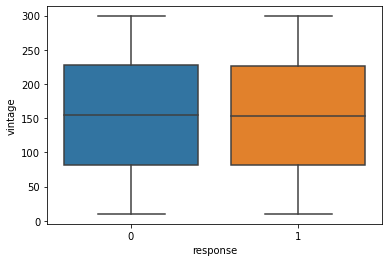

In [54]:
#vintage
sns.boxplot(x='response', y='vintage', data=df4)

<AxesSubplot:xlabel='vintage', ylabel='Count'>

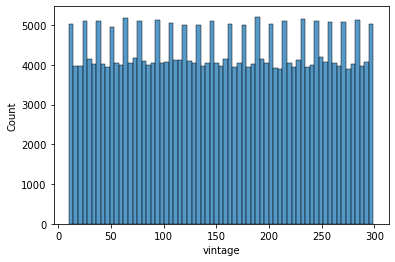

In [55]:
aux00 = df4.loc[df4['response'] == 0, 'vintage']
sns.histplot(aux00)

<AxesSubplot:xlabel='vintage', ylabel='Count'>

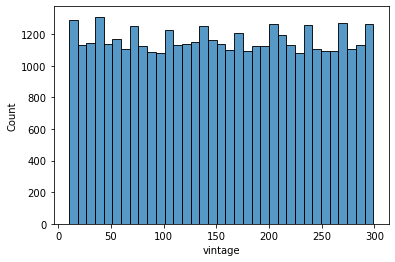

In [56]:
aux01 = df4.loc[df4['response'] == 1, 'vintage']
sns.histplot(aux01)

## 4.2 Bivariate Analysis

### 1. TRUE People between 30 years old are more susceptible to have an insurance, 8.09%

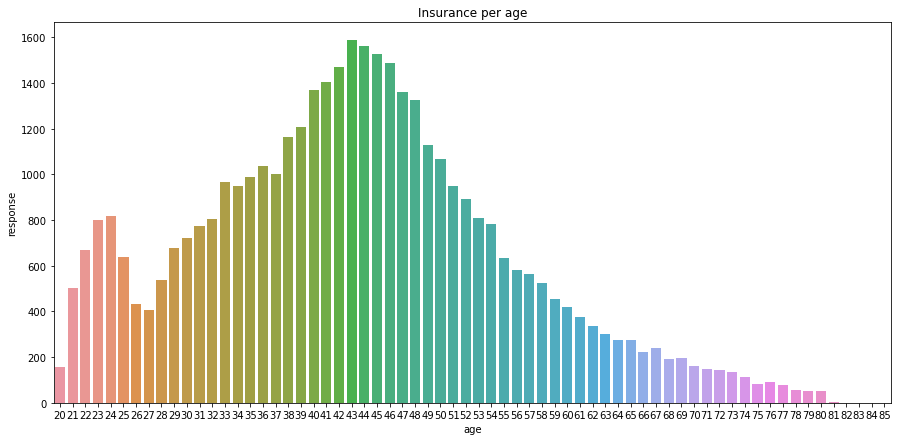

In [57]:
#insurance per age
aux1 = df4[['age', 'response']].groupby('age').sum().reset_index().rename(columns={0:'total'})

#histogram
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='age', y='response', ax=ax, data=aux1)
plt.title('Insurance per age')
plt.show()

In [58]:
#% insurance per age - %
aux1 = df4[(df4['age'] <= 80)]
aux1 = aux1[['age', 'response']].groupby(['age','response']).size().reset_index().rename(columns={0:'total'})
aux1['%_insur_1'] = ""
aux1 = perc_insurance(aux1)

<ipython-input-5-ec34c151601b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['%_insur_1'][i] = p


In [59]:
#divide bewtween two groups between and outside 30
aux1 = aux1[(aux1['response'] == 1)]
aux_30 = aux1.loc[(aux1['age'] >= 30) & (aux1['age'] <= 39)]
aux_30 = pd.DataFrame(aux_30.apply(np.mean)).T

aux_29 = aux1.loc[(aux1['age'] < 30) | (aux1['age'] > 39)]
aux_29 = pd.DataFrame(aux_29.apply(np.mean)).T

#result of average
m = pd.concat([aux_30, aux_29]).T.reset_index()
m.columns = ['index','between 30','outside 30']
#m.drop(['response'], axis=1)
m['index'] = {'mean age': 0, 'response': 1, 'mean quant': 2, 'average % insur': 3}
m

,index,between 30,outside 30
0,mean age,34.500000,53.039216
1,response,1.000000,1.000000
2,mean quant,961.500000,609.254902
3,average % insur,20.252043,12.156705


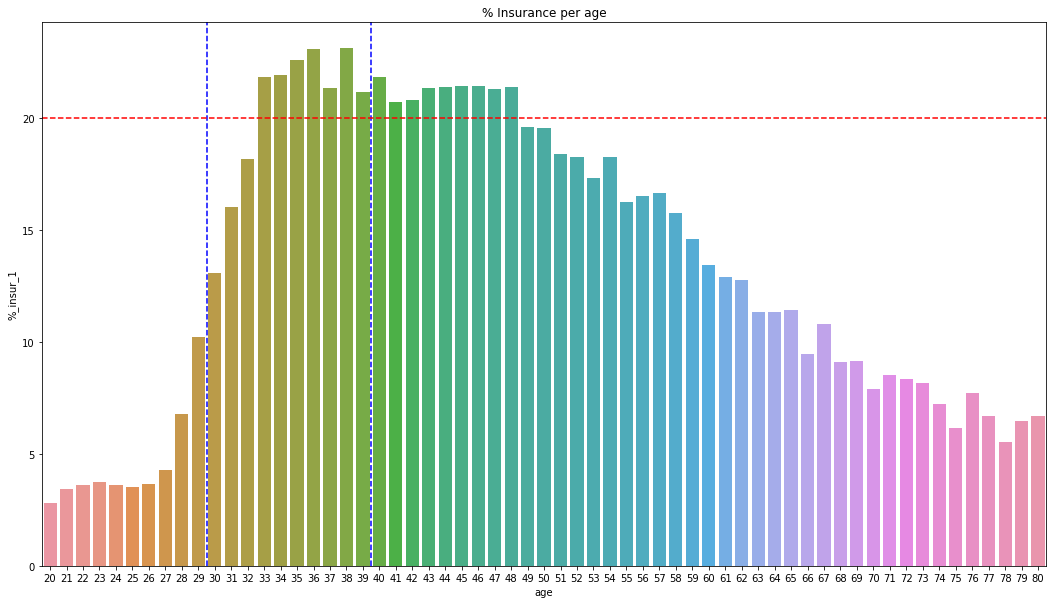

In [60]:
#histogram insurance per age %
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)

graph = sns.barplot(x='age', y='%_insur_1', ax=ax, data=aux1)
graph.axvline(9.5, ymin=0.0, ymax=1.0, linestyle ="--", color='blue')
graph.axvline(19.5, ymin=0.0, ymax=1.0, linestyle ="--", color='blue')
graph.axhline(20, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% Insurance per age')
plt.show()

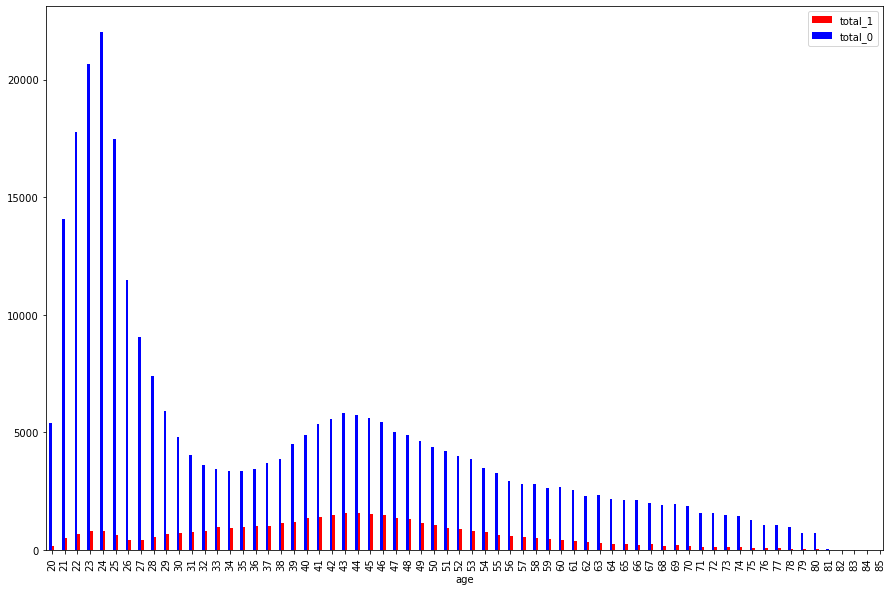

In [61]:
#cvd per height
aux1 = df4[(df4['response'] >= 1)]
aux1 = aux1[['age', 'response']].groupby('age').size().reset_index().rename(columns={0:'total_1'})

aux2 = df4[(df4['response'] <= 0)]
aux2 = aux2[['age', 'response']].groupby('age').size().reset_index().rename(columns={0:'total_0'})

#histogram
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111)

width = 0.2

aux1.plot(x='age', y='total_1', kind='bar', color='red', ax=ax, width=width, position=0)
aux2.plot(x='age', y='total_0', kind='bar', color='blue', ax=ax, width=width, position=1)
plt.show()

### 2. FALSE Men hire 3% more insurances than women

In [62]:
#transform to categorical
#df42 = df4.copy()
#df42['gender'] = df42['gender'].apply({'Female':'women', 2:'men'}.get)

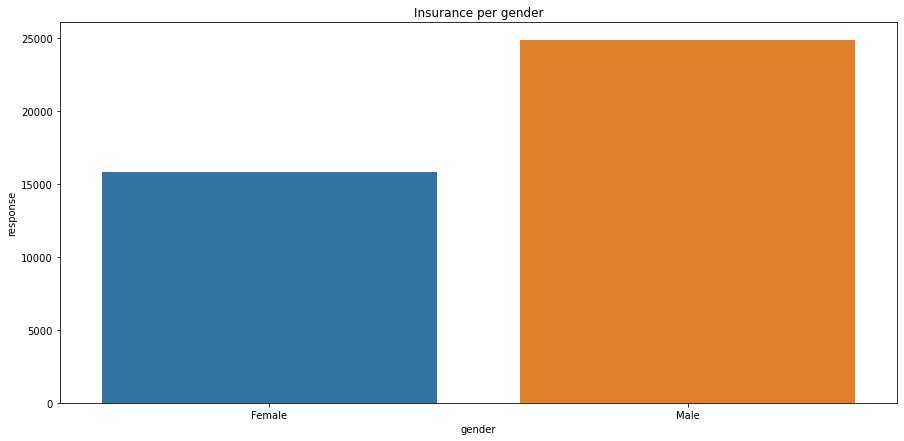

In [63]:
#insurance per gender
aux1 = df4[['gender', 'response']].groupby('gender').sum().reset_index().rename(columns={0:'total'})

#histogram
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='gender', y='response', ax=ax, data=aux1)
plt.title('Insurance per gender')
plt.show()

In [64]:
#calculate % insurance per gender
aux1 = df4[['gender', 'response']].groupby(['gender','response']).size().reset_index().rename(columns={0:'total'})
aux1['%_insur_1'] = ""
aux1 = perc_insurance(aux1)

#result of %
aux1 = aux1[(aux1['response'] >= 1)]
aux1

<ipython-input-5-ec34c151601b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['%_insur_1'][i] = p


,gender,response,total,%_insur_1
1,Female,1,15844,10.334616
3,Male,1,24847,13.772289


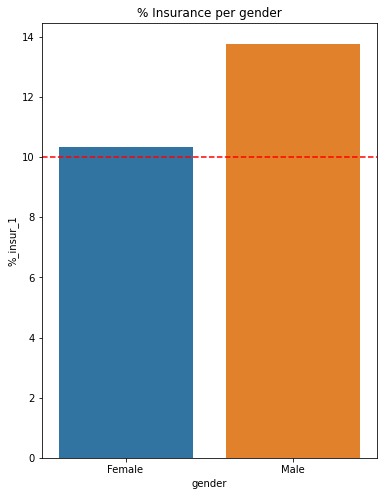

In [65]:
#histogram insurance per gender (average)
fig_dims = (6, 8)
fig, ax = plt.subplots(figsize=fig_dims)

graph = sns.barplot(x='gender', y='%_insur_1', ax=ax, data=aux1)
graph.axhline(10, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% Insurance per gender')
plt.show()

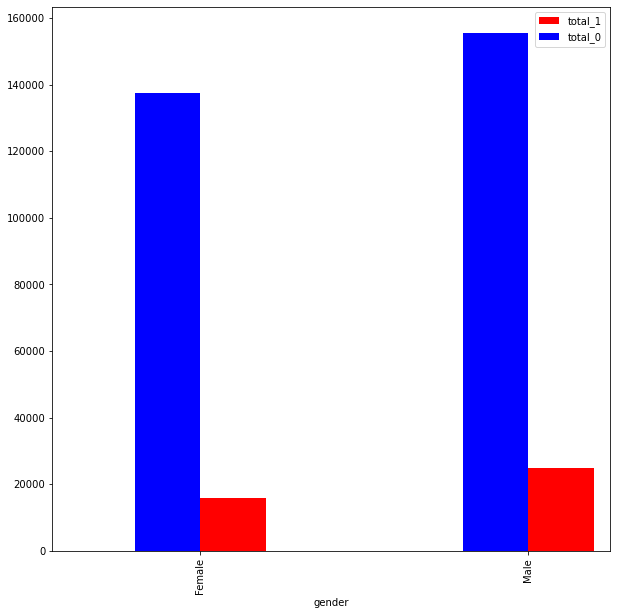

In [66]:
#insurance per gender
aux1 = df4[(df4['response'] >= 1)]
aux1 = aux1[['gender', 'response']].groupby('gender').size().reset_index().rename(columns={0:'total_1'})

aux2 = df4[(df4['response'] <= 0)]
aux2 = aux2[['gender', 'response']].groupby('gender').size().reset_index().rename(columns={0:'total_0'})

#histogram
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)

width = 0.2

aux1.plot(x='gender', y='total_1', kind='bar', color='red', ax=ax, width=width, position=0)
aux2.plot(x='gender', y='total_0', kind='bar', color='blue', ax=ax, width=width, position=1)
plt.show()

### 3. FALSE Owners with cars (> 2 yrs) hire more insurances

In [67]:
#transform to categorical
#df42 = df4.copy()
#df42['vehicle_age'] = df42['vehicle_age'].apply({1:'less 1yr', 1.5:'between 1 - 2 yr', 2:'more 2 yr'}.get)

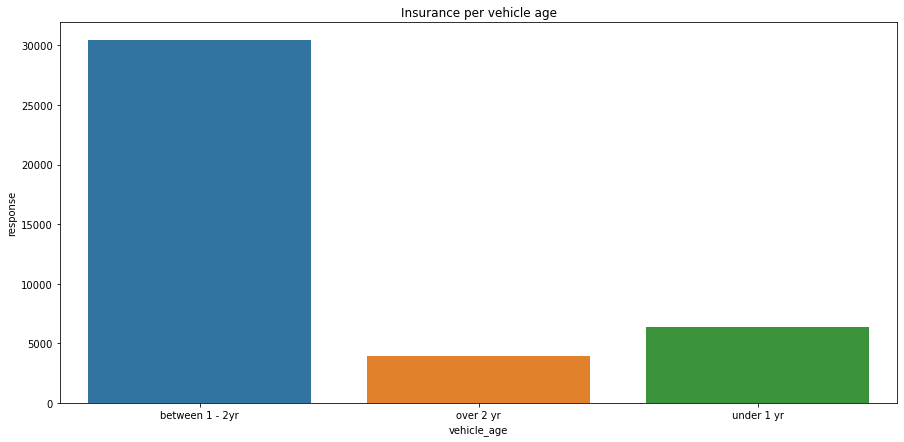

In [68]:
#insurance per vehicle_age
aux1 = df4[['vehicle_age', 'response']].groupby('vehicle_age').sum().reset_index().rename(columns={0:'total'})

#histogram
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='vehicle_age', y='response', ax=ax, data=aux1)
plt.title('Insurance per vehicle age')
plt.show()

In [69]:
#calculate % insurance per vehicle_age
aux1 = df4[['vehicle_age', 'response']].groupby(['vehicle_age','response']).size().reset_index().rename(columns={0:'total'})
aux1['%_insur_1'] = ""
aux1 = perc_insurance(aux1)

#result of %
aux1 = aux1[(aux1['response'] >= 1)]
aux1

<ipython-input-5-ec34c151601b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['%_insur_1'][i] = p


,vehicle_age,response,total,%_insur_1
1,between 1 - 2yr,1,30411,17.404169
3,over 2 yr,1,3924,28.908207
5,under 1 yr,1,6356,4.370938


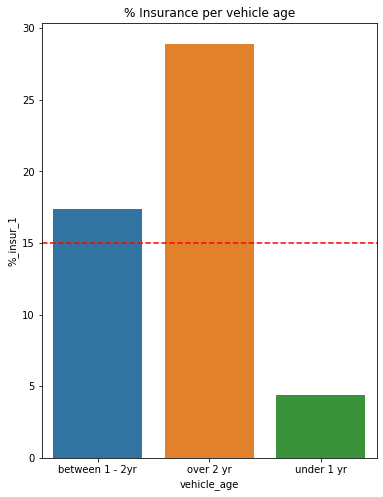

In [70]:
#histogram insurance per vehicle_age (average)
fig_dims = (6, 8)
fig, ax = plt.subplots(figsize=fig_dims)

graph = sns.barplot(x='vehicle_age', y='%_insur_1', ax=ax, data=aux1)
graph.axhline(15, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% Insurance per vehicle age')
plt.show()

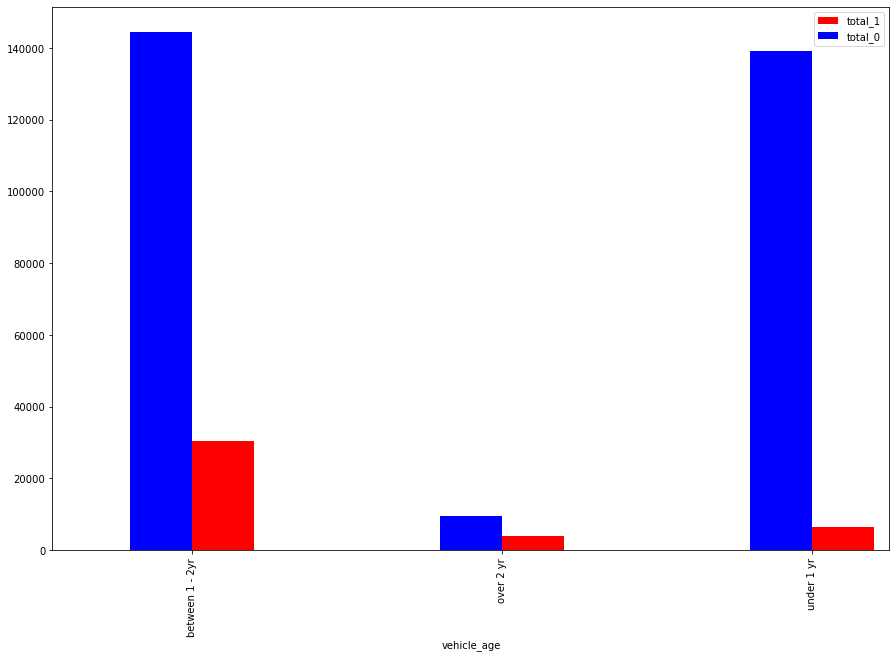

In [71]:
#cvd per height
aux1 = df4[(df4['response'] >= 1)]
aux1 = aux1[['vehicle_age', 'response']].groupby('vehicle_age').size().reset_index().rename(columns={0:'total_1'})

aux2 = df4[(df4['response'] <= 0)]
aux2 = aux2[['vehicle_age', 'response']].groupby('vehicle_age').size().reset_index().rename(columns={0:'total_0'})

#histogram
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111)

width = 0.2

aux1.plot(x='vehicle_age', y='total_1', kind='bar', color='red', ax=ax, width=width, position=0)
aux2.plot(x='vehicle_age', y='total_0', kind='bar', color='blue', ax=ax, width=width, position=1)
plt.show()

### 4. TRUE People with a driver's license hire 6.68% more insurance than those without

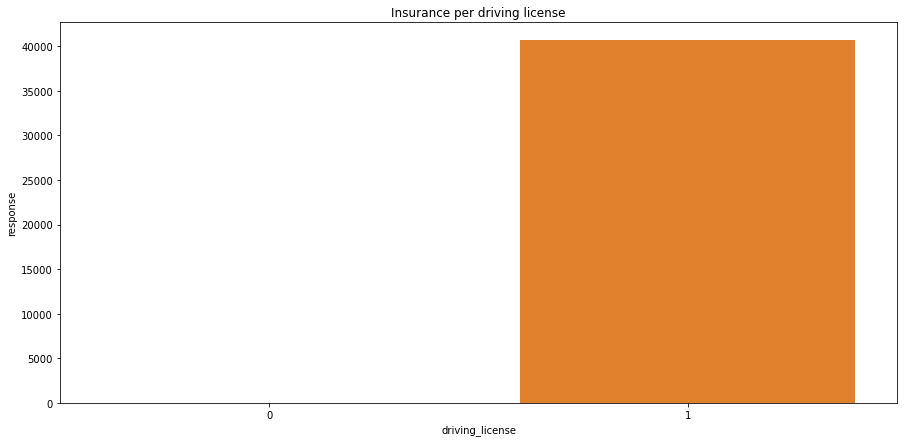

In [72]:
#insurance per driving_license
aux1 = df4[['driving_license', 'response']].groupby('driving_license').sum().reset_index().rename(columns={0:'total'})

#histogram
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='driving_license', y='response', ax=ax, data=aux1)
plt.title('Insurance per driving license')
plt.show()

In [73]:
#calculate % insurance per driving_license
aux1 = df4[['driving_license', 'response']].groupby(['driving_license','response']).size().reset_index().rename(columns={0:'total'})
aux1['%_insur_1'] = ""
aux1 = perc_insurance(aux1)

#result of %
aux1 = aux1[(aux1['response'] >= 1)]
aux1

<ipython-input-5-ec34c151601b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['%_insur_1'][i] = p


,driving_license,response,total,%_insur_1
1,0,1,38,5.531295
3,1,1,40653,12.206788


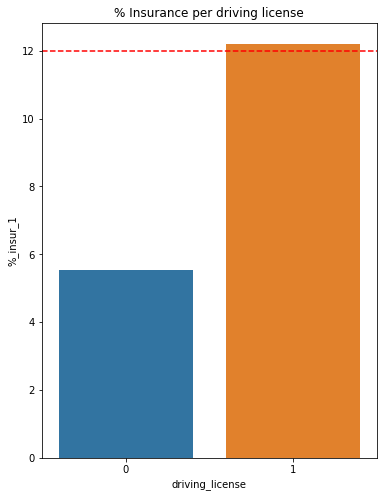

In [74]:
#histogram insurance per driving_license (average)
fig_dims = (6, 8)
fig, ax = plt.subplots(figsize=fig_dims)

graph = sns.barplot(x='driving_license', y='%_insur_1', ax=ax, data=aux1)
graph.axhline(12, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% Insurance per driving license')
plt.show()

### 5. FALSE Owners with vehicle damaged hire insurances

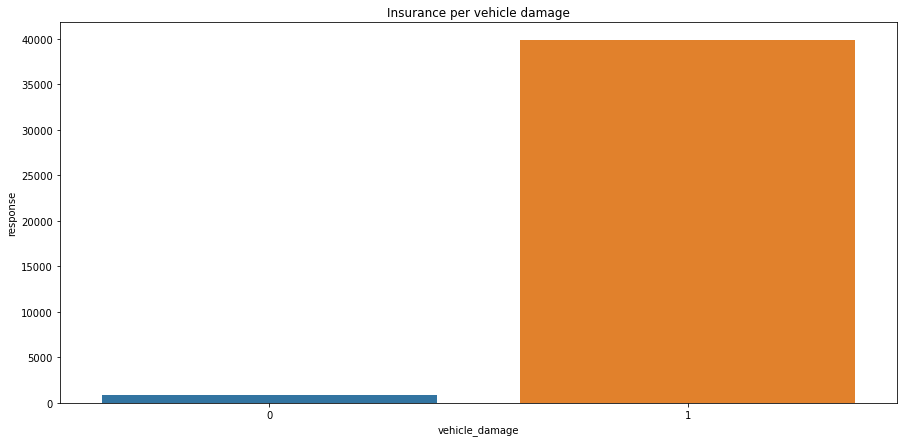

In [75]:
#insurance per vehicle_damage
aux1 = df4[['vehicle_damage', 'response']].groupby('vehicle_damage').sum().reset_index().rename(columns={0:'total'})

#histogram
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='vehicle_damage', y='response', ax=ax, data=aux1)
plt.title('Insurance per vehicle damage')
plt.show()

In [76]:
#calculate % insurance per vehicle_damage
aux1 = df4[['vehicle_damage', 'response']].groupby(['vehicle_damage','response']).size().reset_index().rename(columns={0:'total'})
aux1['%_insur_1'] = ""
aux1 = perc_insurance(aux1)

#result of %
aux1 = aux1[(aux1['response'] >= 1)]
aux1

<ipython-input-5-ec34c151601b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['%_insur_1'][i] = p


,vehicle_damage,response,total,%_insur_1
1,0,1,883,0.532765
3,1,1,39808,23.697495


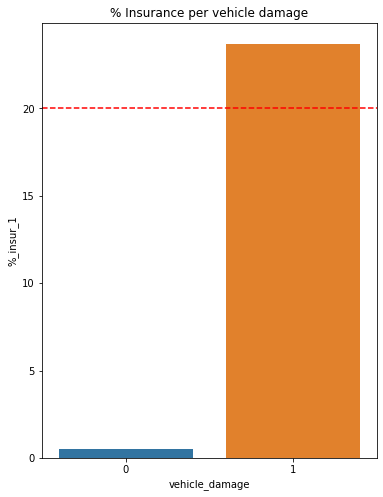

In [77]:
#histogram insurance per vehicle_damage (average)
fig_dims = (6, 8)
fig, ax = plt.subplots(figsize=fig_dims)

graph = sns.barplot(x='vehicle_damage', y='%_insur_1', ax=ax, data=aux1)
graph.axhline(20, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% Insurance per vehicle damage')
plt.show()

### 6. FALSE People previously insured hire another insurance

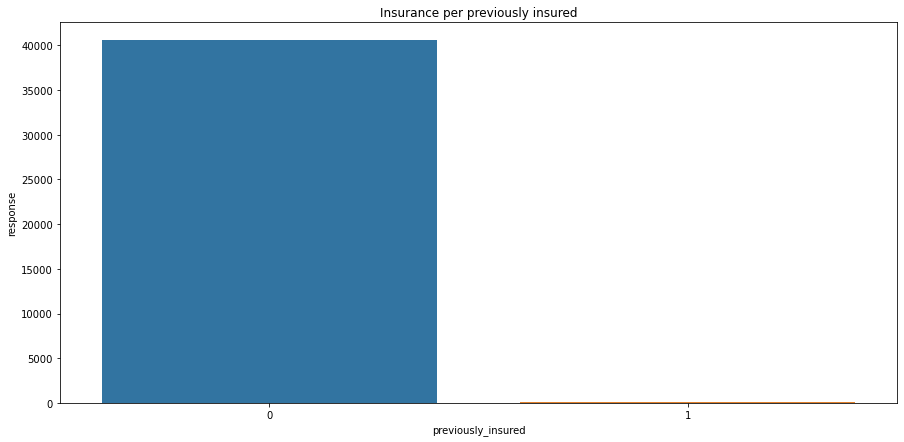

In [78]:
#insurance per previously_insured
aux1 = df4[['previously_insured', 'response']].groupby('previously_insured').sum().reset_index().rename(columns={0:'total'})

#histogram
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='previously_insured', y='response', ax=ax, data=aux1)
plt.title('Insurance per previously insured')
plt.show()

In [79]:
#calculate % insurance per driving_license
aux1 = df4[['previously_insured', 'response']].groupby(['previously_insured','response']).size().reset_index().rename(columns={0:'total'})
aux1['%_insur_1'] = ""
aux1 = perc_insurance(aux1)

#result of %
aux1 = aux1[(aux1['response'] >= 1)]
aux1

<ipython-input-5-ec34c151601b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['%_insur_1'][i] = p


,previously_insured,response,total,%_insur_1
1,0,1,40550,22.481067
3,1,1,141,0.091947


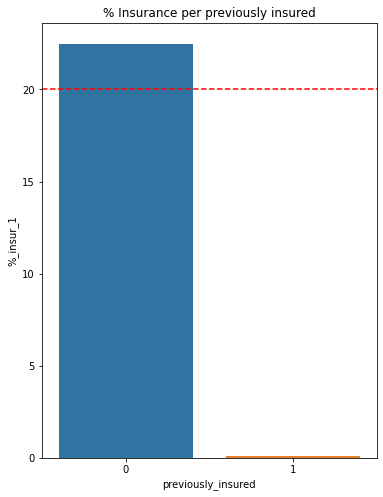

In [80]:
#histogram insurance per previously_insured (average)
fig_dims = (6, 8)
fig, ax = plt.subplots(figsize=fig_dims)

graph = sns.barplot(x='previously_insured', y='%_insur_1', ax=ax, data=aux1)
graph.axhline(20, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% Insurance per previously insured')
plt.show()

### 7. TRUE Higher than 50K annual premium there are more insurances 3.88%

In [81]:
#df42['annual_premium_2'] = df4['annual_premium'].apply(lambda x: '10' if x <= 10000 else x)
#df42['annual_premium_2'] = df4['annual_premium'].apply(lambda x: '15' if (x > 10000 and x <= 20000) else x)
#df42['annual_premium_2'] = df4['annual_premium'].apply(lambda x: '20' if (x > 20000 and x <= 30000) else x)
#df42['annual_premium_2'] = df4['annual_premium'].apply(lambda x: '30' if (x > 30000 and x <= 40000) else x)
#df42['annual_premium_2'] = df4['annual_premium'].apply(lambda x: '40' if (x > 40000 and x <= 50000) else x)
#df42['annual_premium_2'] = df4['annual_premium'].apply(lambda x: '50' if (x > 50000 and x <= 60000) else x)
#df42['annual_premium_2'] = df4['annual_premium'].apply(lambda x: '60' if x > 60000 else x)

In [82]:
df42 = df4.copy()
df42['annual_premium_2'] = df4.apply(lambda x: '10' if x['annual_premium'] <= 10000 else ''
                                                      '15' if (x['annual_premium'] > 10000 and x['annual_premium'] <= 20000) else '' 
                                                      '20' if (x['annual_premium'] > 20000 and x['annual_premium'] <= 30000) else '' 
                                                      '30' if (x['annual_premium'] > 30000 and x['annual_premium'] <= 40000) else '' 
                                                      '40' if (x['annual_premium'] > 40000 and x['annual_premium'] <= 50000) else ''    
                                                      '50' if (x['annual_premium'] > 50000 and x['annual_premium'] <= 60000) else ''   
                                                      '60' if x['annual_premium'] > 60000 else '', axis = 1)


In [83]:
df43 = df42.copy()
df43['annual_premium_2'] = pd.to_numeric(df42['annual_premium_2'],errors = 'coerce')

In [84]:
#transform to categorical
#df43 = df42.copy()
df42['annual_premium_2'] = df43['annual_premium_2'].apply({10:'< 10K', 15:'10 - 20K', 20: '20 - 30K', 30: '30 - 40K', 40: '40 - 50K', 50: '50 - 60K', 60: '> 60K'}.get)

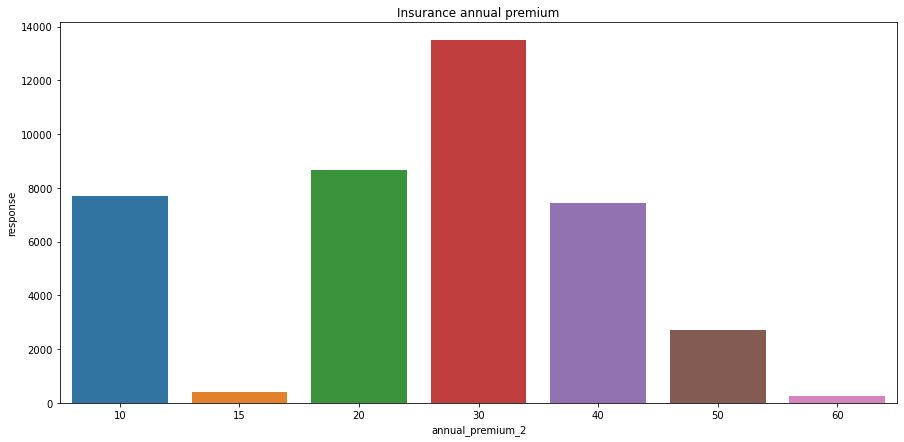

In [85]:
#insurance per annual_premium
aux1 = df43[['annual_premium_2', 'response']].groupby('annual_premium_2').sum().reset_index().rename(columns={0:'total'})

#histogram
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='annual_premium_2', y='response', ax=ax, data=aux1)
plt.title('Insurance annual premium')
plt.show()

In [86]:
#% insurance per age - %
aux1 = df43[['annual_premium_2', 'response']].groupby(['annual_premium_2','response']).size().reset_index().rename(columns={0:'total'})
aux1['%_insur_1'] = ""
aux1 = perc_insurance(aux1)

<ipython-input-5-ec34c151601b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['%_insur_1'][i] = p


In [87]:
#divide bewtween two groups between and outside 30
aux1 = aux1[(aux1['response'] == 1)]
aux_50 = aux1[(aux1['annual_premium_2'] >= 50)]
aux_50 = pd.DataFrame(aux_50.apply(np.mean)).T

aux_49 = aux1.loc[(aux1['annual_premium_2'] < 50)]
aux_49 = pd.DataFrame(aux_49.apply(np.mean)).T

#result of average
m = pd.concat([aux_50, aux_49]).T.reset_index()
m.columns = ['index','above 50','less 50']
#m.drop(['response'], axis=1)
m['index'] = {'mean': 0, 'response': 1, 'mean quant': 2, 'average % insur': 3}
m

,index,above 50,less 50
0,mean,55.000000,23.000000
1,response,1.000000,1.000000
2,mean quant,1488.500000,7542.800000
3,average % insur,15.373642,11.486705


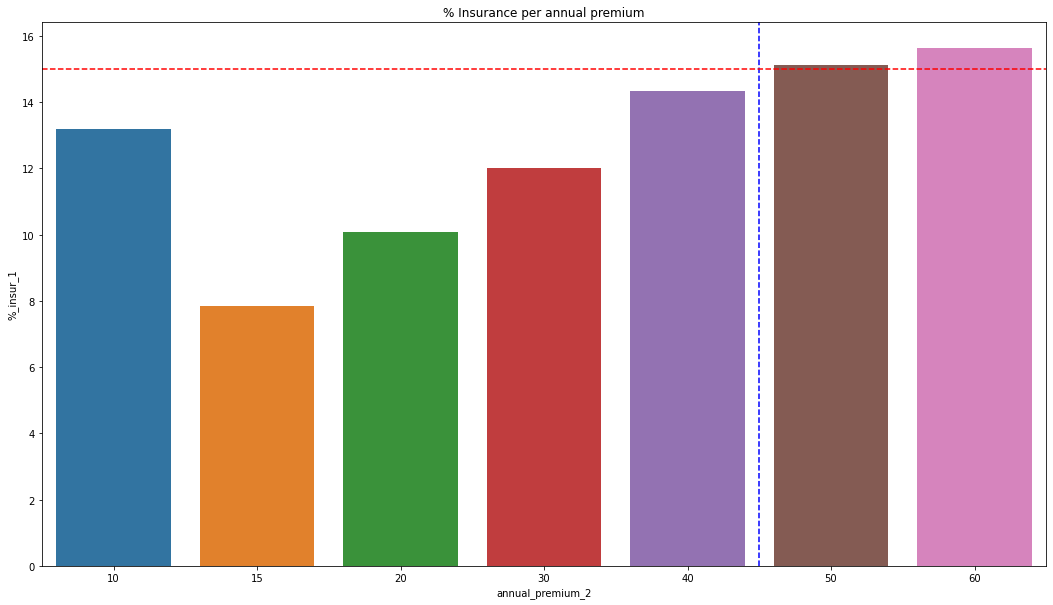

In [88]:
#histogram insurance per age %
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)

graph = sns.barplot(x='annual_premium_2', y='%_insur_1', ax=ax, data=aux1)
graph.axvline(4.5, ymin=0.0, ymax=1.0, linestyle ="--", color='blue')
graph.axhline(15, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% Insurance per annual premium')
plt.show()

# 5.0. Data Preparation

In [30]:
df5 = df4.copy()

In [31]:
x = df4.drop('response', axis=1)
y = df4['response'].copy()

x_train, x_validation, y_train, y_validation = ms.train_test_split(x,y, test_size = 0.20)
df5 = pd.concat([x_train, y_train], axis=1)

## 5.1. Standardization

In [32]:
ss = pp.StandardScaler()

#annual_premium
df5['annual_premium'] = ss.fit_transform(df5[['annual_premium']].values)
pickle.dump(ss,open('C:/Users/Henrique/repos/Insurance All/scaler/annual_premium_scaler.pkl', 'wb'))

## 5.2. Rescaling

In [33]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

#age
df5['age'] = mms_age.fit_transform(df5[['age']].values)
pickle.dump(ss,open('C:/Users/Henrique/repos/Insurance All/scaler/age_scaler.pkl', 'wb'))

#vintage
df5['vintage'] = mms_vintage.fit_transform(df5[['vintage']].values)
pickle.dump(ss,open('C:/Users/Henrique/repos/Insurance All/scaler/vintage_scaler.pkl', 'wb'))

## 5.3. Enconder

In [34]:
#gender
target_encode_gender = df5.groupby('gender')['response'].mean()
df5.loc[:, 'gender'] = df5['gender'].map(target_encode_gender)
pickle.dump(ss,open('C:/Users/Henrique/repos/Insurance All/scaler/gender_scaler.pkl', 'wb'))

#region_code
target_encode_region_code = df5.groupby('region_code')['response'].mean()
df5.loc[:, 'region_code'] = df5['region_code'].map(target_encode_region_code)
pickle.dump(ss,open('C:/Users/Henrique/repos/Insurance All/scaler/region_code_scaler.pkl', 'wb'))

#vehicle_age
df5 = pd.get_dummies(df5, prefix='vehicle_age', columns = ['vehicle_age'])

#policy_sales_channel
fe_policy_sales_channel = df5.groupby('policy_sales_channel').size()/len(df5)
df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map(fe_policy_sales_channel)
pickle.dump(ss,open('C:/Users/Henrique/repos/Insurance All/scaler/policies_sales_channel_scaler.pkl', 'wb'))

## 5.4. Validation Preparation

In [35]:
#gender
x_validation.loc[:, 'gender'] = x_validation.loc[:, 'gender'].map(target_encode_gender)

#age
x_validation.loc[:, 'age'] = mms_age.transform(x_validation[['age']].values)

#region_code
x_validation.loc[:, 'region_code'] = x_validation['region_code'].map(target_encode_region_code)

#vehicle_age
x_validation = pd.get_dummies(x_validation, prefix='vehicle_age', columns = ['vehicle_age'])

#annual_premium
x_validation.loc[:, 'annual_premium'] = ss.transform(x_validation[['annual_premium']].values)

#policy_sales_channel
x_validation.loc[:, 'policy_sales_channel'] = x_validation['policy_sales_channel'].map(fe_policy_sales_channel)

#vintage
x_validation.loc[:, 'vintage'] = mms_vintage.transform(x_validation[['vintage']].values)

#fillna
x_validation = x_validation.fillna(0)

C:\Users\Henrique\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Henrique\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\Henrique\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

## 5.5. Normalization

In [36]:
# SMOTETomek
#df5_x = df5.drop('response', axis=1)
#df5_y = df5['response'].copy()

# instantiate SMOTE Object
#smt = SMOTETomek(random_state=42)

# Resample
#x_smt, y_smt = smt.fit_resample(df5_x, df5_y)

#print(f'y before over-sampling = {Counter(df5_y)}')
#print(f'y after over-sampling = {Counter(y_smt)}')

#y before over-sampling = Counter({0: 250786, 1: 35045})
#y after over-sampling = Counter({0: 227379, 1: 227379})

 # Saving Embedded sampling dataset
#x_smt['response'] = y_smt
#x_smt.to_csv('../Data/df_smt.csv', sep=';', index_label=False)

# 6.0. Feature Selection

In [37]:
df6 = df5.copy()

x_train = df6.copy()

## 6.1. Feature Importancia

In [155]:
#model definition
forest = en.ExtraTreesClassifier (n_estimators =250, random_state = 0, n_jobs=-1)

#data preparation
x_train_n = df6.drop(['id', 'response'], axis=1)
y_train_n = y_train.values
forest.fit(x_train_n, y_train_n)

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature ranking:
                       feature  importance
0                      vintage    0.269815
0               annual_premium    0.225237
0                          age    0.175217
0                  region_code    0.111604
0               vehicle_damage    0.077140
0         policy_sales_channel    0.065210
0           previously_insured    0.047002
0       vehicle_age_under 1 yr    0.013442
0                       gender    0.006336
0  vehicle_age_between 1 - 2yr    0.006324
0        vehicle_age_over 2 yr    0.002211
0              driving_license    0.000462


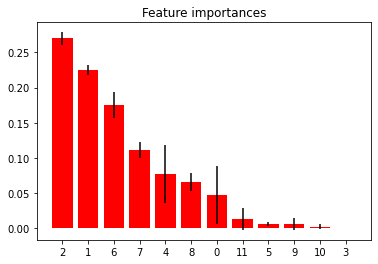

In [156]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

#print the feature ranking
print('Feature ranking:')
df = pd.DataFrame()
for i, j in zip(x_train_n, forest.feature_importances_):
    aux = pd.DataFrame({'feature': i, 'importance': j}, index=[0])
    df = pd.concat([df, aux], axis=0)

print(df.sort_values('importance', ascending=False))

#plot the impurity-based feature importances of the forest
plt.figure()
plt.title('Feature importances')
plt.bar(range(x_train_n.shape[1]), importances[indices], color='r', yerr=std[indices], align='center')
plt.xticks(range(x_train_n.shape[1]), indices)
plt.xlim([-1, x_train_n.shape[1]])
plt.show()

## 6.2. Lasso

In [157]:
df6_lasso = df6.drop('response', axis=1)

features = df6_lasso.columns

pipeline = Pipeline([('scaler',StandardScaler()),('model',Lasso())])

search = GridSearchCV(pipeline,{'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=0)

search.fit(x_train,y_train)

search.best_params_

coefficients = search.best_estimator_.named_steps['model'].coef_

importance = np.abs(coefficients)

In [162]:
cols_selected_lasso = np.array(df6.columns)[importance > 0]
print('Columns selected: ', cols_selected_lasso)

cols_not_selected_lasso = np.array(df6.columns)[importance == 0]
print('Columns not selected: ', cols_not_selected_lasso)

Columns selected:  ['response']
Columns not selected:  ['id' 'previously_insured' 'annual_premium' 'vintage' 'driving_license'
 'vehicle_damage' 'gender' 'age' 'region_code' 'policy_sales_channel'
 'vehicle_age_between 1 - 2yr' 'vehicle_age_over 2 yr'
 'vehicle_age_under 1 yr']


## 6.3. Relieff

In [159]:
fs = ReliefF(n_neighbors=100, n_features_to_keep=14)
x_train_relieff = fs.fit_transform(x_train.values, y_train.values)
print("(No. of tuples, No. of Columns before ReliefF) : "+str(df6.shape[0])+
      "\n(No. of tuples, No. of Columns after ReliefF) : "+str(x_train_relieff.shape))

(No. of tuples, No. of Columns before ReliefF) : 266978
(No. of tuples, No. of Columns after ReliefF) : (266978, 14)


In [160]:
x_train_relieff[1]

array([1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.37650365e-01,
       1.93633932e-01, 1.30057019e-01, 4.46153846e-01, 6.00229859e-02,
       5.50173010e-01, 1.77334000e+05])

In [163]:
df6.columns

Index(['id', 'previously_insured', 'annual_premium', 'vintage',
       'driving_license', 'vehicle_damage', 'gender', 'age', 'region_code',
       'policy_sales_channel', 'response', 'vehicle_age_between 1 - 2yr',
       'vehicle_age_over 2 yr', 'vehicle_age_under 1 yr'],
      dtype='object')

In [164]:
cols_not_selected_lasso = ['id', 'previously_insured', 'vintage',
                           'gender', 'age', 'region_code', 'policy_sales_channel',
                           'vehicle_age_between 1 - 2yr', 'vehicle_age_over 2 yr', 'vehicle_age_under 1 yr']

# 7.0. Machine Learning

In [41]:
df7 = df6.copy()

In [42]:
cols_selected = ['previously_insured', 'annual_premium', 'vintage', 'vehicle_damage', 'age',
                 'region_code','policy_sales_channel',]

x_train = df7[cols_selected]
x_val = x_validation[cols_selected]
y_val = y_validation.copy()

## 7.1. KNN

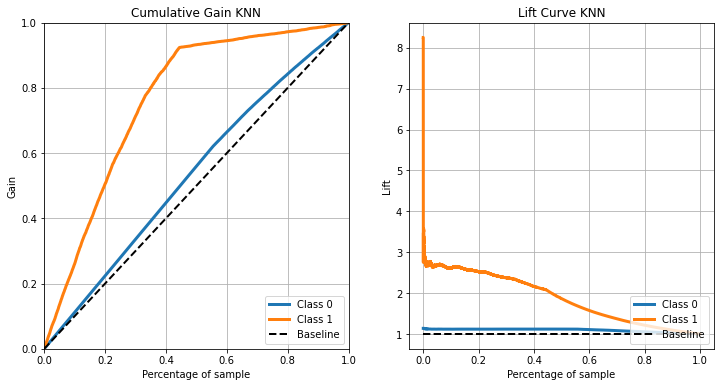

In [167]:
#model definition
knn_model = nh.KNeighborsClassifier(n_neighbors=10)

#model training
knn_model.fit(x_train, y_train)

#model prediciotn
yhat_knn = knn_model.predict_proba(x_val)

#accumulative gain
fig, axs = plt.subplots(ncols= 2, figsize = (12,6))
skplt.metrics.plot_cumulative_gain(y_val, yhat_knn, ax=axs[0],title='Cumulative Gain KNN');
skplt.metrics.plot_lift_curve(y_val, yhat_knn,ax=axs[1],title='Lift Curve KNN');

### 7.1.1. KNN with PCA

In [ ]:
#define the number of eigenvectors (autovetor) + eigenvalues (autovalores)
pca = d.PCA().fit(x_train)
k = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.99)

#change data to new space
pca = d.PCA(k).fit(x_train)

x_train_pca = pca.transform(x_train)
x_val_pca = pca.transform(x_val)

In [ ]:
ohe = pp.OneHotEncoder()
y_train_pca = ohe.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_val_pca = ohe.transform(y_val.values.reshape(-1, 1)).toarray()

In [ ]:
#model definition
knn_model = nh.KNeighborsClassifier(n_neighbors=7)

#model training
knn_model.fit(x_train_pca, y_train_pca)

#model prediciotn
yhat_knn_pca = knn_model.predict_proba(x_val_pca)

#list to np.array
yhat_knn_pca = np.array(yhat_knn_pca)

#reshape 3D to 2D array
yhat_knn_pca = yhat_knn_pca.reshape(74158,2*2)

#selecting 2 columns
yhat_knn_pca = yhat_knn_pca[:,:2]

#accumulative gain
skplt.metrics.plot_cumulative_gain(y_val_pca,yhat_knn_pca)

## 7.2. Logistic Regression

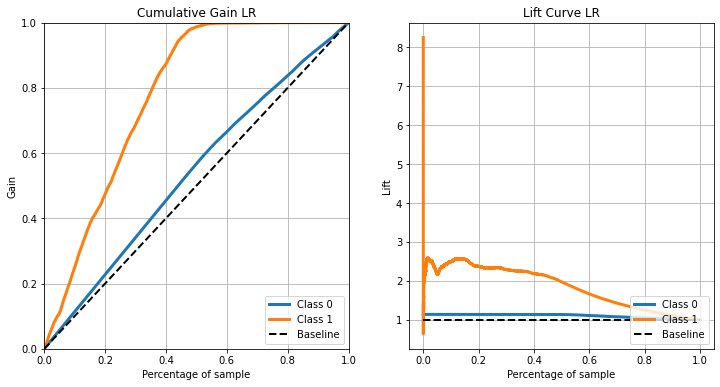

In [168]:
#model definition
lr_model = lm.LogisticRegression(random_state=42)

#model training
lr_model.fit(x_train, y_train)

#model prediction
yhat_lr = lr_model.predict_proba(x_val)

#Accumulative Gain
fig, axs = plt.subplots(ncols= 2, figsize = (12,6))
skplt.metrics.plot_cumulative_gain(y_val, yhat_lr, ax=axs[0],title='Cumulative Gain LR');
skplt.metrics.plot_lift_curve(y_val, yhat_lr,ax=axs[1],title='Lift Curve LR');

## 7.3. Extra Trees

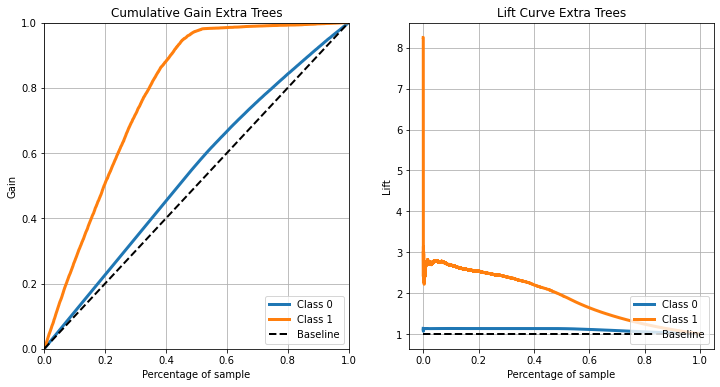

In [169]:
#model definition
et_model = en.ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=42)

#model training
et_model.fit(x_train, y_train)

#model prediction
yhat_et = et_model.predict_proba(x_val)

#Accumulative Gain
fig, axs = plt.subplots(ncols= 2, figsize = (12,6))
skplt.metrics.plot_cumulative_gain(y_val, yhat_et, ax=axs[0],title='Cumulative Gain Extra Trees');
skplt.metrics.plot_lift_curve(y_val, yhat_et,ax=axs[1],title='Lift Curve Extra Trees');

## 7.4. Random Forest

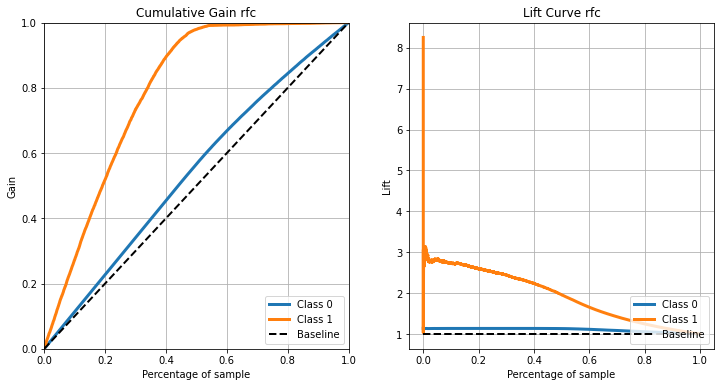

In [170]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)

rf_model = rf_model.fit(x_train,y_train)

yhat_rf = rf_model.predict_proba(x_val)

fig, axs = plt.subplots(ncols= 2, figsize = (12,6))
skplt.metrics.plot_cumulative_gain(y_val, yhat_rf, ax=axs[0],title='Cumulative Gain rfc');
skplt.metrics.plot_lift_curve(y_val, yhat_rf,ax=axs[1],title='Lift Curve rfc');

## 7.5. Naive Bayes

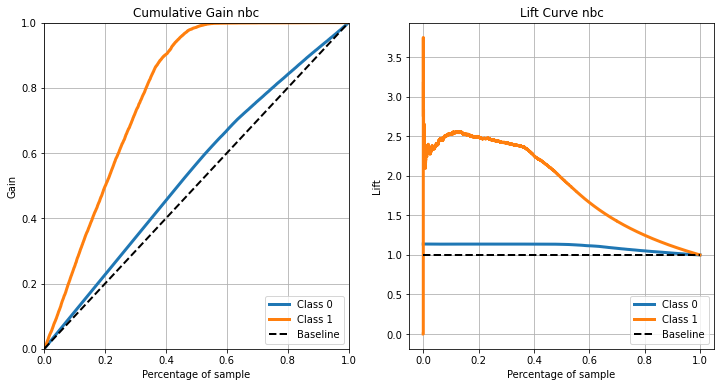

In [171]:
nb_model = GaussianNB()

nb_model = nb_model.fit(x_train,y_train)

yhat_nb = nb_model.predict_proba(x_val)

fig, axs = plt.subplots(ncols= 2, figsize = (12,6))
skplt.metrics.plot_cumulative_gain(y_val, yhat_nb, ax=axs[0],title='Cumulative Gain nbc');
skplt.metrics.plot_lift_curve(y_val, yhat_nb,ax=axs[1],title='Lift Curve nbc');

## 7.6. LGBM

<AxesSubplot:title={'center':'Lift Curve lgbm'}, xlabel='Percentage of sample', ylabel='Lift'>

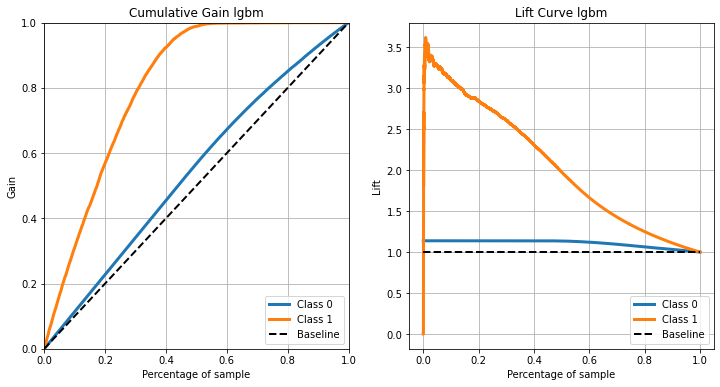

In [172]:
lgbm_model = LGBMClassifier()

lgbm_model = lgbm_model.fit(x_train,y_train)

yhat_lgbm = lgbm_model.predict_proba(x_val)

fig, axs = plt.subplots(ncols= 2, figsize = (12,6))
skplt.metrics.plot_cumulative_gain(y_val, yhat_lgbm, ax=axs[0],title='Cumulative Gain lgbm');
skplt.metrics.plot_lift_curve(y_val, yhat_lgbm,ax=axs[1],title='Lift Curve lgbm')

## 7.7. XGBoost

C:\Users\Henrique\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<AxesSubplot:title={'center':'Lift Curve xgb'}, xlabel='Percentage of sample', ylabel='Lift'>

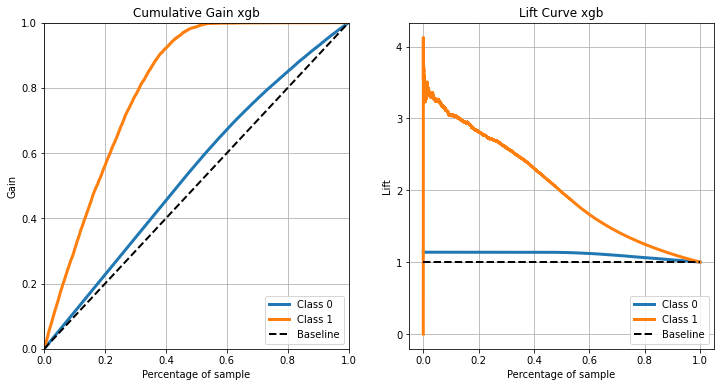

In [173]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='error')

xgb_model = xgb_model.fit(x_train,y_train)

yhat_xgb = xgb_model.predict_proba(x_val)

fig, axs = plt.subplots(ncols= 2, figsize = (12,6))
skplt.metrics.plot_cumulative_gain(y_val, yhat_xgb, ax=axs[0],title='Cumulative Gain xgb');
skplt.metrics.plot_lift_curve(y_val, yhat_xgb,ax=axs[1],title='Lift Curve xgb')

## 7.8. Guassian NB

<AxesSubplot:title={'center':'Lift Curve Guassian NB'}, xlabel='Percentage of sample', ylabel='Lift'>

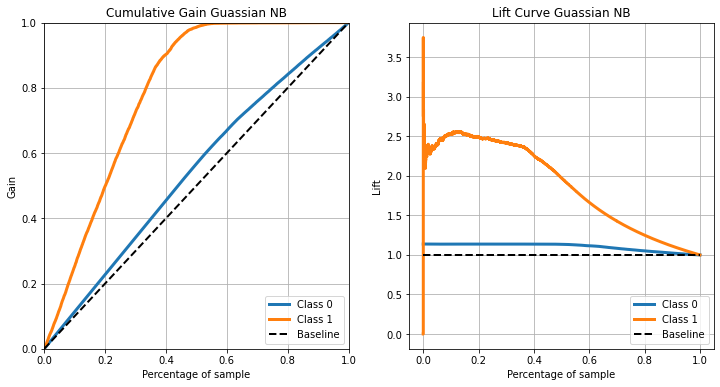

In [174]:
gnb_model = GaussianNB()

gnb_model = gnb_model.fit(x_train,y_train)

yhat_gnb = gnb_model.predict_proba(x_val)

fig, axs = plt.subplots(ncols= 2, figsize = (12,6))
skplt.metrics.plot_cumulative_gain(y_val, yhat_gnb, ax=axs[0],title='Cumulative Gain Guassian NB');
skplt.metrics.plot_lift_curve(y_val, yhat_gnb,ax=axs[1],title='Lift Curve Guassian NB')

## 7.9. AdaBoost

<AxesSubplot:title={'center':'Lift Curve Ada'}, xlabel='Percentage of sample', ylabel='Lift'>

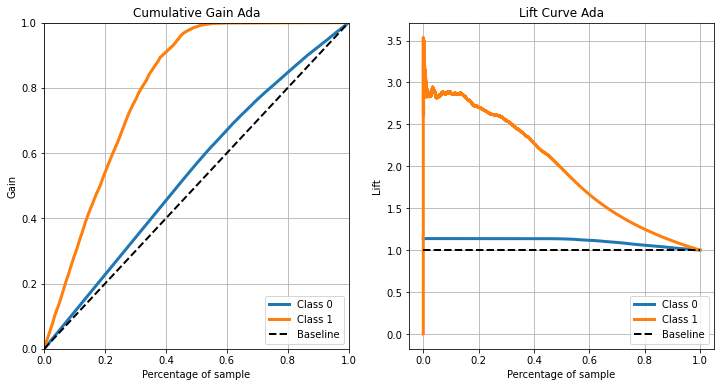

In [175]:
ab_model = AdaBoostClassifier(n_estimators=10, learning_rate = 1)

ab_model = ab_model.fit(x_train,y_train)

yhat_ab = ab_model.predict_proba(x_val)

fig, axs = plt.subplots(ncols= 2, figsize = (12,6))
skplt.metrics.plot_cumulative_gain(y_val, yhat_ab, ax=axs[0],title='Cumulative Gain Ada');
skplt.metrics.plot_lift_curve(y_val, yhat_ab,ax=axs[1],title='Lift Curve Ada')

# 8.0. Model Performance

In [176]:
x_validation['response'] = y_validation
perc = 0.2

#calculate precision and recall - KNN
precision_knn = round(precision_at_k (x_validation, yhat_knn, perc),3)
recall_knn = round(recall_at_k(x_validation, yhat_knn, perc),3)

models_performance = pd.DataFrame({'Model':['KNN'], "Precision_at_k": [precision_knn], 
                                   "Recall_at_k": [recall_knn]})

#calculate precision and recall - LR
precision_lr = round(precision_at_k (x_validation, yhat_lr, perc),3)
recall_lr = round(recall_at_k(x_validation, yhat_lr, perc),3)

models_performance = models_performance.append(pd.Series(['Logistic Regression', precision_lr, recall_lr], 
                                                         index=models_performance.columns), ignore_index=True)

#calculate precision and recall - ET
precision_et = round(precision_at_k (x_validation, yhat_et, perc),3)
recall_et = round(recall_at_k(x_validation, yhat_et, perc),3)

models_performance = models_performance.append(pd.Series(['Extra Trees', precision_et, recall_et], 
                                                         index=models_performance.columns), ignore_index=True)

#calculate precision and recall - RF
precision_rf = round(precision_at_k (x_validation, yhat_rf, perc),3)
recall_rf = round(recall_at_k(x_validation, yhat_rf, perc),3)

models_performance = models_performance.append(pd.Series(['Random Forest', precision_rf, recall_rf], 
                                                         index=models_performance.columns), ignore_index=True)

#calculate precision and recall - NB
precision_nb = round(precision_at_k (x_validation, yhat_nb, perc),3)
recall_nb = round(recall_at_k(x_validation, yhat_nb, perc),3)

models_performance = models_performance.append(pd.Series(['Naive Bayes', precision_nb, recall_nb], 
                                                         index=models_performance.columns), ignore_index=True)

#calculate precision and recall - LGBM
precision_lgbm = round(precision_at_k (x_validation, yhat_lgbm, perc),3)
recall_lgbm = round(recall_at_k(x_validation, yhat_lgbm, perc),3)

models_performance = models_performance.append(pd.Series(['LGBM', precision_lgbm, recall_lgbm], 
                                                         index=models_performance.columns), ignore_index=True)

#calculate precision and recall - XGBoost
precision_xgb = round(precision_at_k (x_validation, yhat_xgb, perc),3)
recall_xgb = round(recall_at_k(x_validation, yhat_xgb, perc),3)

models_performance = models_performance.append(pd.Series(['XGBoost', precision_xgb, recall_xgb], 
                                                         index=models_performance.columns), ignore_index=True)

#calculate precision and recall - Guassian NB
precision_gnb = round(precision_at_k (x_validation, yhat_gnb, perc),3)
recall_gnb = round(recall_at_k(x_validation, yhat_gnb, perc),3)

models_performance = models_performance.append(pd.Series(['Guassian NB', precision_gnb, recall_gnb], 
                                                         index=models_performance.columns), ignore_index=True)

#calculate precision and recall - Guassian AdaBoost
precision_ab = round(precision_at_k (x_validation, yhat_ab, perc),3)
recall_ab = round(recall_at_k(x_validation, yhat_ab, perc),3)

models_performance = models_performance.append(pd.Series(['AdaBoost', precision_ab, recall_ab], 
                                                         index=models_performance.columns), ignore_index=True)

models_performance

,Model,Precision_at_k,Recall_at_k
0,KNN,0.308,0.508
1,Logistic Regression,0.288,0.475
2,Extra Trees,0.308,0.508
3,Random Forest,0.315,0.520
4,Naive Bayes,0.302,0.498
5,LGBM,0.345,0.569
6,XGBoost,0.340,0.562
7,Guassian NB,0.302,0.498
8,AdaBoost,0.327,0.540


# 9.0. Cross Validation

In [177]:
models_performance_cv = pd.DataFrame({'Model':[], "Precision_at_k": [], "Recall_at_k": []})

In [178]:
models_performance_cv = cross_validation(models_performance_cv, 5, 'KNN', knn_model, x_train, y_train)

models_performance_cv = cross_validation(models_performance_cv, 5, 'Logistic Regression', lr_model, x_train, y_train)

models_performance_cv = cross_validation(models_performance_cv, 5, 'Extra Trees', et_model, x_train, y_train)

models_performance_cv = cross_validation(models_performance_cv, 5, 'Random Forest', rf_model, x_train, y_train)

models_performance_cv = cross_validation(models_performance_cv, 5, 'Naive Bayes', nb_model, x_train, y_train)

models_performance_cv = cross_validation(models_performance_cv, 5, 'LGBM', lgbm_model, x_train, y_train)

models_performance_cv = cross_validation(models_performance_cv, 5, 'XGBoost', xgb_model, x_train, y_train)

models_performance_cv = cross_validation(models_performance_cv, 5, 'Guassian NB', gnb_model, x_train, y_train)

models_performance_cv = cross_validation(models_performance_cv, 5, 'AdaBoost', ab_model, x_train, y_train)

C:\Users\Henrique\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\Henrique\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\Henrique\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

C:\Users\Henrique\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\Henrique\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\Henrique\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [179]:
models_performance_cv

,Model,Precision_at_k,Recall_at_k
0,KNN,0.3088 +/- 0.0026,0.506 +/- 0.0046
1,Logistic Regression,0.291 +/- 0.0028,0.4766 +/- 0.0048
2,Extra Trees,0.313 +/- 0.0036,0.513 +/- 0.0054
3,Random Forest,0.3186 +/- 0.0039,0.522 +/- 0.0065
4,Naive Bayes,0.3028 +/- 0.0031,0.496 +/- 0.0048
5,LGBM,0.3518 +/- 0.0028,0.5762 +/- 0.0047
6,XGBoost,0.3492 +/- 0.0032,0.5718 +/- 0.0054
7,Guassian NB,0.3028 +/- 0.0031,0.496 +/- 0.0048
8,AdaBoost,0.3336 +/- 0.0016,0.5462 +/- 0.0029


# 10.0. Hyperparameters

## 10.1. LGBM

In [180]:
np.random.seed(42)
lgbm_parameter = {'num_leaves':  tuple(np.random.randint(5,100,size=10)),
                  'max_depth': tuple(np.random.randint(1,10,size=10)),
                  'min_split_gain': tuple(np.random.uniform(0.001,0.01,size=10)),
                  'min_child_weight': tuple(np.random.randint(10,100,size=10)),
                  'subsample': tuple(np.random.uniform(0.0,1.0,size=10)),
                  'colsample_bytree': tuple(np.random.uniform(0.0,1.0,size=10))
                 }

In [183]:
models_performance_lgbm_hp = pd.DataFrame({'Model':[], "Precision_at_k": [], "Recall_at_k": []})

for i in range (50):
    #escolher parametro aleatoriamente
    hp = {k: random.sample(v,1)[0] for k,v in lgbm_parameter.items()}
    print(str(i),hp)
    model_lgbm = LGBMClassifier(num_leaves=hp['num_leaves'],
                                  max_depth=hp['max_depth'],
                                  min_split_gain=hp['min_split_gain'],
                                  min_child_weight=hp['min_child_weight'],
                                  subsample=hp['subsample'],
                                  colsample_bytree=hp['colsample_bytree']).fit(x_train,y_train)

    yhat_lgbm_hp = model_lgbm.predict_proba(x_val)
    precision_lgbm_hp = round(precision_at_k (x_validation, yhat_lgbm_hp, 0.2),3)
    recall_lgbm_hp = round(recall_at_k(x_validation, yhat_lgbm_hp, 0.2),3)
    models_performance_lgbm_hp = models_performance_lgbm_hp.append(pd.Series(['LGBM '+str(i), precision_lgbm_hp, recall_lgbm_hp], 
                                                         index=models_performance.columns), ignore_index=True)
models_performance_lgbm_hp

0 {'num_leaves': 56, 'max_depth': 8, 'min_split_gain': 0.006506676052501416, 'min_child_weight': 71, 'subsample': 0.450499251969543, 'colsample_bytree': 0.8331949117361643}
1 {'num_leaves': 65, 'max_depth': 5, 'min_split_gain': 0.008491983767203797, 'min_child_weight': 60, 'subsample': 0.6803075385877797, 'colsample_bytree': 0.6099966577826209}
2 {'num_leaves': 76, 'max_depth': 3, 'min_split_gain': 0.002636424704863906, 'min_child_weight': 71, 'subsample': 0.3854165025399161, 'colsample_bytree': 0.6832635188254582}
3 {'num_leaves': 65, 'max_depth': 5, 'min_split_gain': 0.008491983767203797, 'min_child_weight': 71, 'subsample': 0.230893825622149, 'colsample_bytree': 0.18223608778806233}
4 {'num_leaves': 87, 'max_depth': 4, 'min_split_gain': 0.005722807884690141, 'min_child_weight': 71, 'subsample': 0.013264961159866528, 'colsample_bytree': 0.20794166286818883}
5 {'num_leaves': 19, 'max_depth': 4, 'min_split_gain': 0.004887505167779043, 'min_child_weight': 71, 'subsample': 0.942201755684

47 {'num_leaves': 79, 'max_depth': 3, 'min_split_gain': 0.002911051996104486, 'min_child_weight': 71, 'subsample': 0.8599404067363206, 'colsample_bytree': 0.7553614103176525}
48 {'num_leaves': 19, 'max_depth': 2, 'min_split_gain': 0.00373818018663584, 'min_child_weight': 69, 'subsample': 0.3854165025399161, 'colsample_bytree': 0.3910606075732408}
49 {'num_leaves': 56, 'max_depth': 8, 'min_split_gain': 0.00373818018663584, 'min_child_weight': 73, 'subsample': 0.6803075385877797, 'colsample_bytree': 0.17336465350777208}


,Model,Precision_at_k,Recall_at_k
0,LGBM 0,0.346,0.570
1,LGBM 1,0.346,0.570
2,LGBM 2,0.344,0.567
3,LGBM 3,0.342,0.564
4,LGBM 4,0.340,0.562
5,LGBM 5,0.340,0.562
6,LGBM 6,0.341,0.564
7,LGBM 7,0.345,0.570
8,LGBM 8,0.346,0.571
9,LGBM 9,0.339,0.560


In [184]:
parameter_select = {'num_leaves': 79, 'max_depth': 6, 'min_split_gain': 0.002636424704863906, 'min_child_weight': 71, 'subsample': 0.015966252220214194, 'colsample_bytree': 0.24102546602601171}

## 10.2. XGBoost

In [185]:
np.random.seed(42)
xgb_parameter = {'n_estimators':  tuple(np.random.randint(50,5000,size=10)),
                  'eta': tuple(np.random.uniform(0.01,0.03,size=10)),
                  'max_depth': tuple(np.random.randint(1,10,size=10)),
                  'subsample': tuple(np.random.uniform(0.0,1.0,size=10)),
                  'colsample_bytree': tuple(np.random.uniform(0.0,1.0,size=10))
                 }

In [186]:
models_performance_xgb_hp = pd.DataFrame({'Model':[], "Precision_at_k": [], "Recall_at_k": []})

for i in range (1):
    #escolher parametro aleatoriamente
    hp = {k: random.sample(v,1)[0] for k,v in xgb_parameter.items()}
    print(hp)
    model_xgb = xgb.XGBClassifier(n_estimators=hp['n_estimators'],
                                  eta=hp['eta'],
                                  max_depth=hp['max_depth'],
                                  subsample=hp['subsample'],
                                  colsample_bytree=hp['colsample_bytree']).fit(x_train,y_train)

    yhat_xgb_hp = model_xgb.predict_proba(x_val)
    precision_xgb_hp = round(precision_at_k (x_validation, yhat_xgb_hp, 0.2),3)
    recall_xgb_hp = round(recall_at_k(x_validation, yhat_xgb_hp, 0.2),3)
    models_performance_xgb_hp = models_performance_xgb_hp.append(pd.Series(['XGBoost '+str(i), precision_xgb_hp, recall_xgb_hp], 
                                                         index=models_performance.columns), ignore_index=True)
models_performance_xgb_hp

{'n_estimators': 3822, 'eta': 0.029844231185824348, 'max_depth': 7, 'subsample': 0.4951769101112702, 'colsample_bytree': 0.31171107608941095}


C:\Users\Henrique\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:06:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Precision_at_k,Recall_at_k
0,XGBoost 0,0.336,0.554


# 11.0. Final Model

In [52]:
#vehicle_damage
x_test['vehicle_damage'] = x_test['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)

#vehicle_age
x_test['vehicle_age'] = x_test['vehicle_age'].apply(lambda x: 'under 1 yr'
                                              if x == '< 1 Year' else x)
x_test['vehicle_age'] = x_test['vehicle_age'].apply(lambda x: 'between 1 - 2yr'
                                              if x == '1-2 Year' else x)
x_test['vehicle_age'] = x_test['vehicle_age'].apply(lambda x: 'over 2 yr'
                                              if x == '> 2 Years' else x)

#gender
x_test.loc[:, 'gender'] = x_test.loc[:, 'gender'].map(target_encode_gender)

#age
x_test.loc[:, 'age'] = mms_age.transform(x_test[['age']].values)

#region_code
x_test.loc[:, 'region_code'] = x_test['region_code'].map(target_encode_region_code)

#vehicle_age
x_test = pd.get_dummies(x_test, prefix='vehicle_age', columns = ['vehicle_age'])

#annual_premium
x_test.loc[:, 'annual_premium'] = ss.transform(x_test[['annual_premium']].values)

#policy_sales_channel
x_test.loc[:, 'policy_sales_channel'] = x_test['policy_sales_channel'].map(fe_policy_sales_channel)

#vintage
x_test.loc[:, 'vintage'] = mms_vintage.transform(x_test[['vintage']].values)

#fillna
x_test = x_test.fillna(0)

cols_selected = ['previously_insured', 'annual_premium', 'vintage', 'vehicle_damage', 'age',
                 'region_code','policy_sales_channel',]

x_test = x_test[cols_selected]

<ipython-input-52-753fea309c8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['vehicle_damage'] = x_test['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)
<ipython-input-52-753fea309c8b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['vehicle_age'] = x_test['vehicle_age'].apply(lambda x: 'under 1 yr'
<ipython-input-52-753fea309c8b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [53]:
model_lgbm = LGBMClassifier(num_leaves=79,
                                  max_depth=6,
                                  min_split_gain=0.002636424704863906,
                                  min_child_weight=71,
                                  subsample=0.015966252220214194,
                                  colsample_bytree=0.24102546602601171).fit(x_train,y_train)

yhat_lgbm_final = model_lgbm.predict_proba(x_test)

<AxesSubplot:title={'center':'Lift Curve lgbm'}, xlabel='Percentage of sample', ylabel='Lift'>

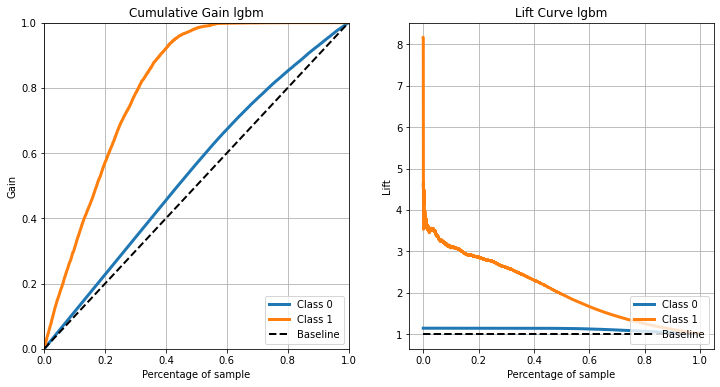

In [55]:
fig, axs = plt.subplots(ncols= 2, figsize = (12,6))
skplt.metrics.plot_cumulative_gain(y_test, yhat_lgbm_final, ax=axs[0],title='Cumulative Gain lgbm');
skplt.metrics.plot_lift_curve(y_test, yhat_lgbm_final,ax=axs[1],title='Lift Curve lgbm')

In [56]:
df_final_performance = pd.DataFrame()
df_mp = x_test.copy()
df_mp['id'] = x_test_id
df_mp['response'] = y_test

df_final_performance = topK_performance(df_mp,yhat_lgbm_final,0.20) 

In [57]:
df_final_performance

,Model,perc,k,precision,recall,target_total,target_at_k,perc_target
0,LGBM,0.2,7622.0,0.114653,0.187353,4665.0,2668.0,0.571919


In [72]:
df.shape[0]

342998

In [76]:
calls=20000
totalLeads=df.shape[0]
percCalls=calls/totalLeads

df_final_performance = topK_performance(df_mp,yhat_lgbm_final,percCalls) 

df_final_performance

,Model,perc,k,precision,recall,target_total,target_at_k,perc_target
0,LGBM,0.058309,2222.0,0.11561,0.055091,4665.0,892.0,0.191211


In [77]:
calls=40000
totalLeads=df.shape[0]
percCalls=calls/totalLeads

df_final_performance = topK_performance(df_mp,yhat_lgbm_final,percCalls) 

df_final_performance

,Model,perc,k,precision,recall,target_total,target_at_k,perc_target
0,LGBM,0.116619,4444.0,0.112936,0.10761,4665.0,1676.0,0.359271


# 12.0. Model Deployment

In [ ]:
import pickle

import numpy  as np
import pandas as pd

class HealtInsurance(object):
    def __init__(self):
        self.home = 'C:/Users/Henrique/repos/Insurance All'
        self.age_scaler                    = pickle.load(open(self.home_path + 'src/scaler/age_scaler.pkl', 'rb'))
        self.annual_premium_scaler         = pickle.load(open(self.home_path + 'src/scaler/annual_premium_scaler.pkl', 'rb'))
        self.gender_scaler                 = pickle.load(open(self.home_path + 'src/scaler/gender_scaler.pkl', 'rb'))
        self.policies_sales_channel_scaler = pickle.load(open(self.home_path + 'src/scaler/policies_sales_channel_scaler.pkl', 'rb'))
        self.region_code_scaler            = pickle.load(open(self.home_path + 'src/scaler/region_code_scaler.pkl', 'rb'))
        self.vehicle_age_scaler            = pickle.load(open(self.home_path + 'src/scaler/vehicle_age_scaler.pkl', 'rb'))
        self.vintage_scaler                = pickle.load(open(self.home_path + 'src/scaler/vintage_scaler.pkl', 'rb'))
        
    def feature_engineering (self, data):
        #vehicle_damage
        data['vehicle_damage'] = data['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)

        #vehicle_age
        data['vehicle_age'] = data['vehicle_age'].apply(lambda x: 'under 1 yr'
                                                      if x == '< 1 Year' else x)
        data['vehicle_age'] = data['vehicle_age'].apply(lambda x: 'between 1 - 2yr'
                                                      if x == '1-2 Year' else x)
        data['vehicle_age'] = data['vehicle_age'].apply(lambda x: 'over 2 yr'
                                                      if x == '> 2 Years' else x)
        return data
        
    def data_preparation (self, data):
        #annual_premium
        data['annual_premium'] = self.annual_premium_scaler.transform(data[['annual_premium']].values)

        #age
        data['age'] = self.age_scaler.transform(data[['age']].values)

        #vintage
        data['vintage'] = self.vintage_scaler.transform(data[['vintage']].values)
        
        data.loc[:, 'gender'] = data['gender'].map(self.gender_scaler)

        #region_code
        data.loc[:, 'region_code'] = data['region_code'].map(self.region_code_scaler)

        #vehicle_age
        data = pd.get_dummies(data, prefix='vehicle_age', columns = ['vehicle_age'])

        #policy_sales_channel
        data.loc[:, 'policy_sales_channel'] = data['policy_sales_channel'].map(self.policy_sales_channel_scaler)
        
        cols_selected = ['previously_insured', 'annual_premium', 'vintage', 'vehicle_damage', 'age',
                 'region_code','policy_sales_channel',]
        
        return cols_selected
    
    def get_prediction(self, model, original_data, test_data):
        #model prediction
        pred = model.predict_proba(test_data)
        
        #join prediction into original data
        original_data['score'] = pred[:, 1].tolist()
        
        return original_data.to_json(orient='records', date_format='iso')

In [ ]:
import pickle
import pandas as pd

from flask                           import Flask, request, Response
from healthinsurance.HealthInsurance import HealthInsurance

#load model
path = 'C:/Users/Henrique/repos/Insurance All'
model = pickle.load(open(path+'src/trained_model/model_adaboost.pkl', 'rb'))

# initialize API
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def health_insurance_predict():
    test_json = request.get_json()
    
    if test_json: # there is data
        if isinstance(test_json, dict): # unique example
            test_raw = pd.DataFrame(test_json, index=[0])
        
        else: # multiple example
            test_raw = pd.DataFrame(test_json, columns=test_json[0].keys())
        
        # Instantiate HealthInsurance class
        pipeline = HealthInsurance()
        
        # feature engineering
        df1 = pipeline.rename_columns(test_raw)
        
        df2 = pipeline.feature_engineering(df1)
        
        # data preparation
        df3 = pipeline.data_preparation(df2)
        
        # prediction
        df_response = pipeline.get_prediction(model, test_raw, df3)
        
        return df_response
    
    else:
        return Response('{}', status=200, mimetype='applcation/json')
    
if __name__ == '__main__':
    app.run('0.0.0.0', debug=True)

## 12.1. API Tester

In [ ]:
# loading test dataset
df_test = pd.read_csv('Data/test.csv', sep=',')
df_test = df_test.sample(30)



In [ ]:
# convert dataframe to json
data = json.dumps(df_test.to_dict(orient='records'))

In [ ]:
# API Call
#url = 'http://0.0.0.0:5000/predict'
url = 'https://health-insurance-predict-score.herokuapp.com/predict'
      
header = {'Content-type': 'application/json'}

r = requests.post(url, data=data, headers=header)
print(f'Status code {r.status_code}')